## Pellet and Meal Analysis and Distribution

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
from meals import process_meal_data
from preprocessing import get_bhv_num
from accuracy import graph_single_stats
from path import *

export_root = '../export/Supplementary'
os.makedirs(os.path.join(export_root, "WT_meal"), exist_ok=True)
time_threshold = 60
pellet_threshold = 2
female_avg_pellet = [] # pellet per hour
female_dark_meals = [] # percentage of meals in inactive/dark phase
female_fir_meal = []
flip_female_meal_count = []
female_fir_good_meal = []
female_in_meal_ratios = []

### female Group

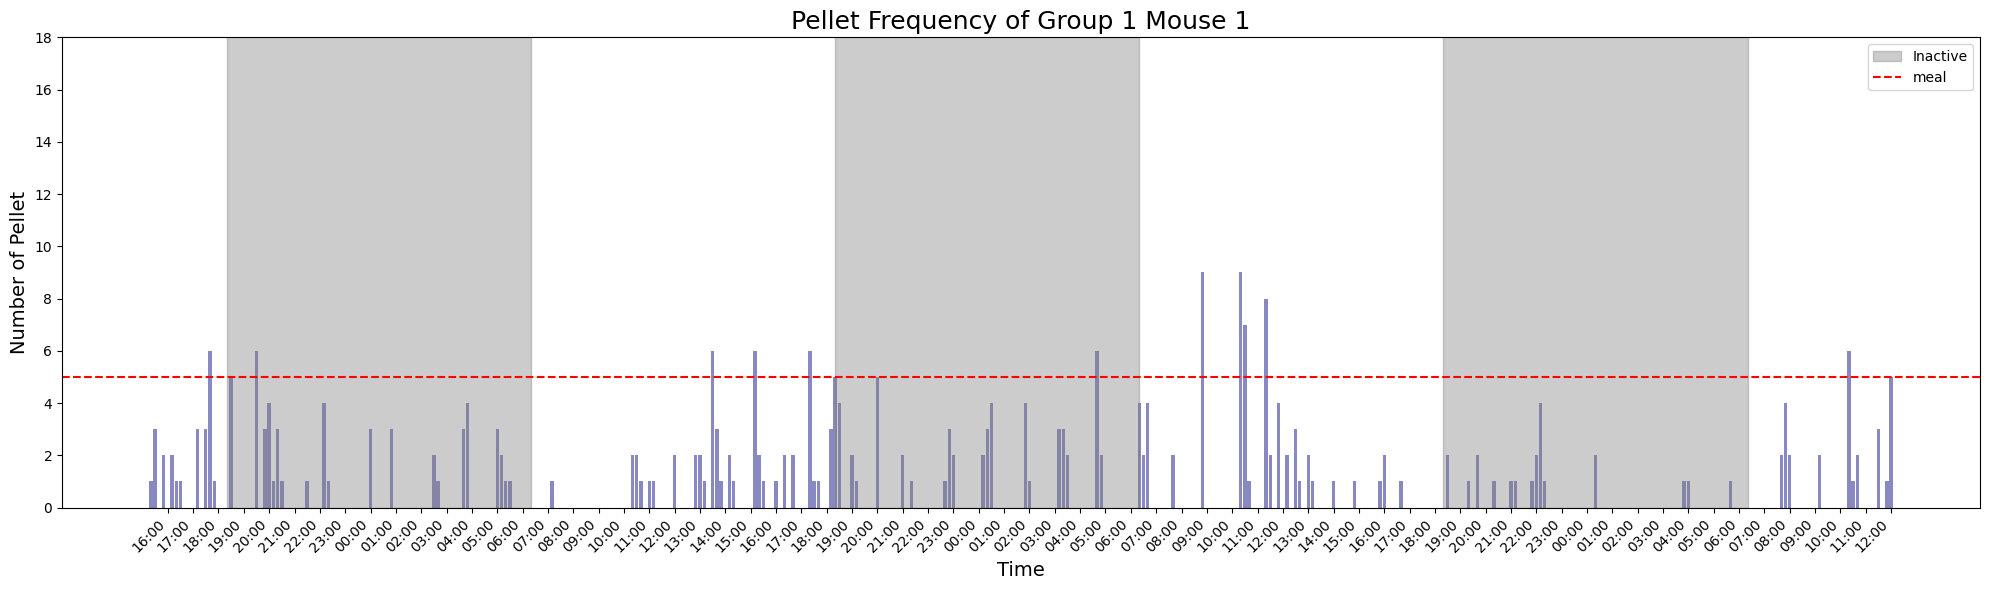

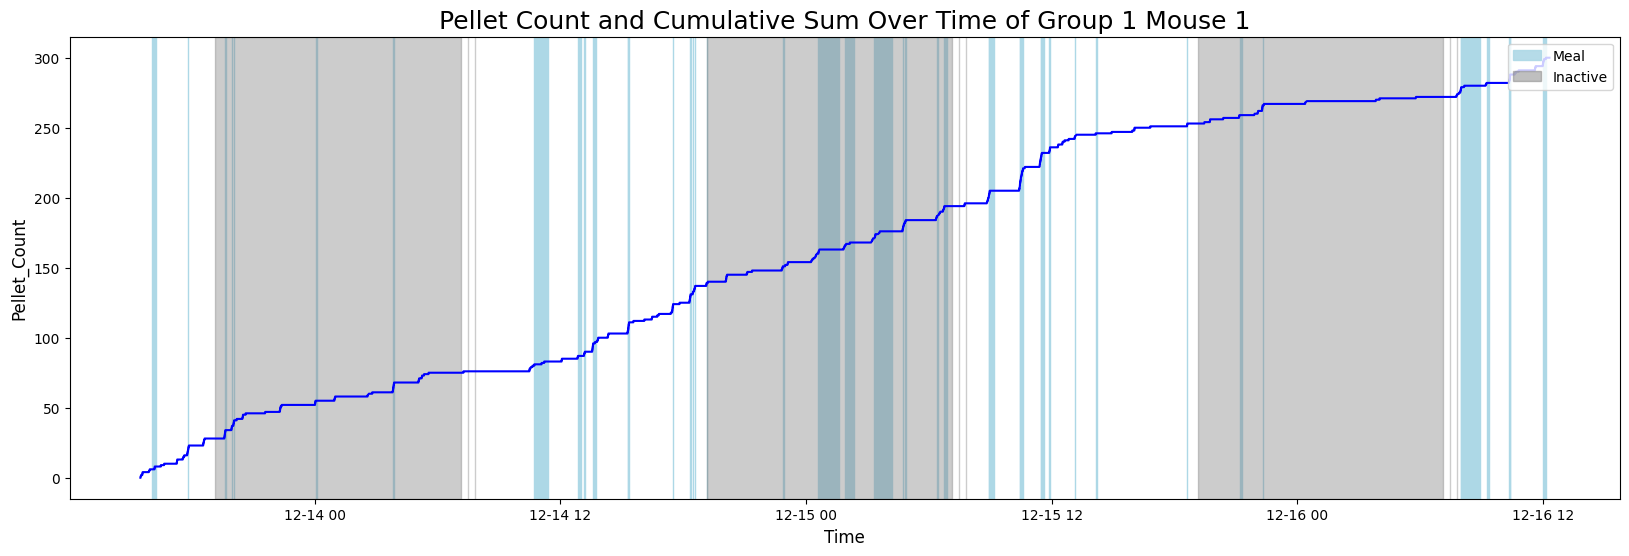

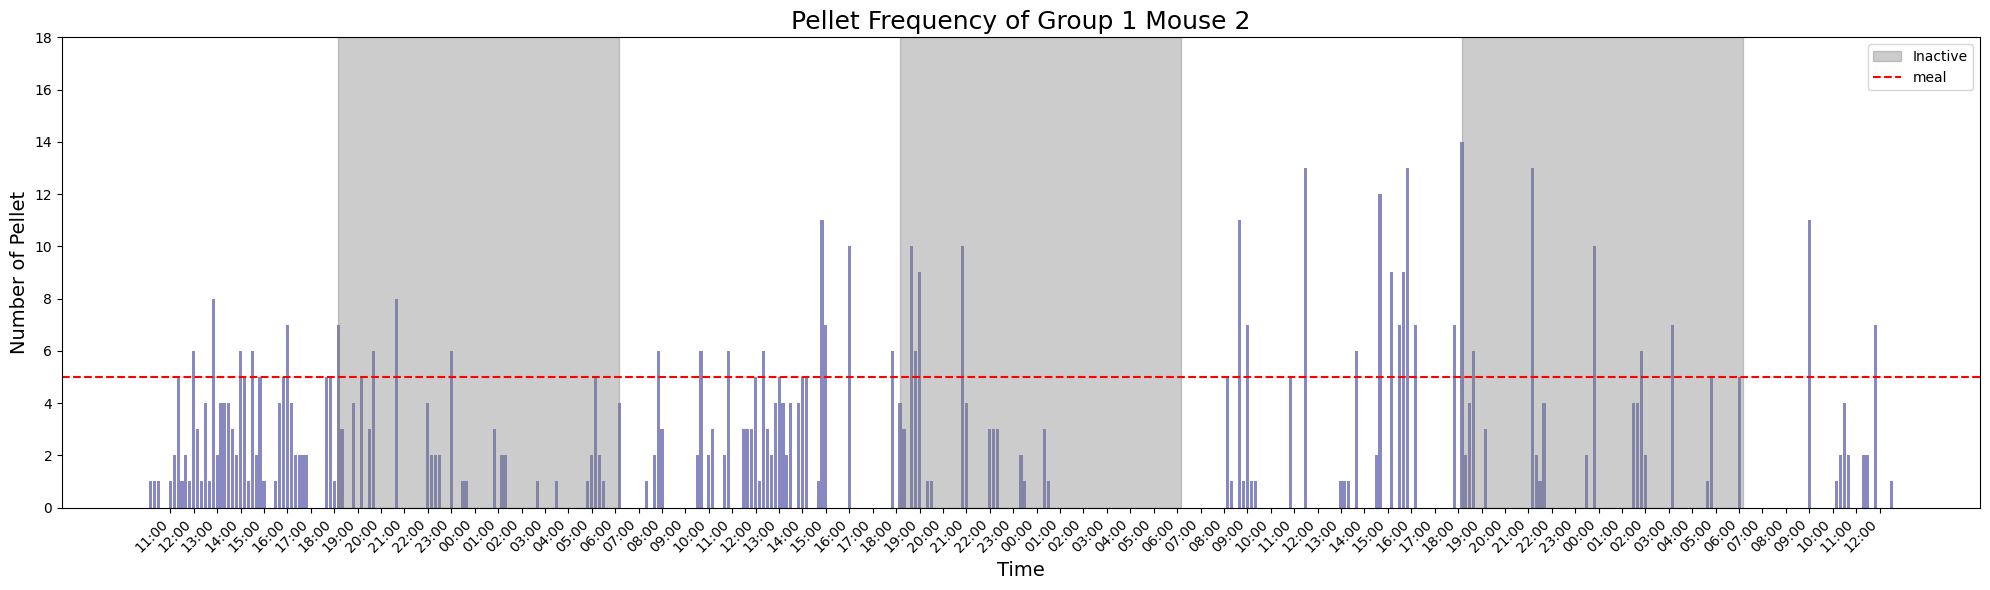

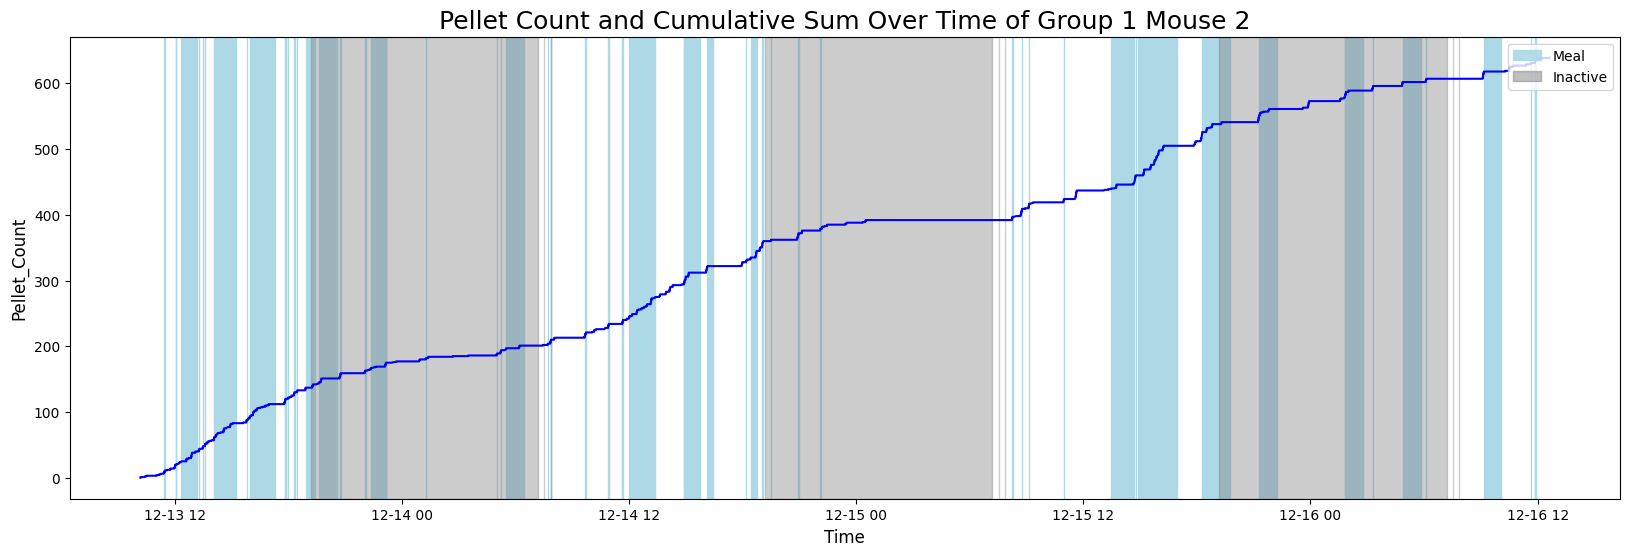

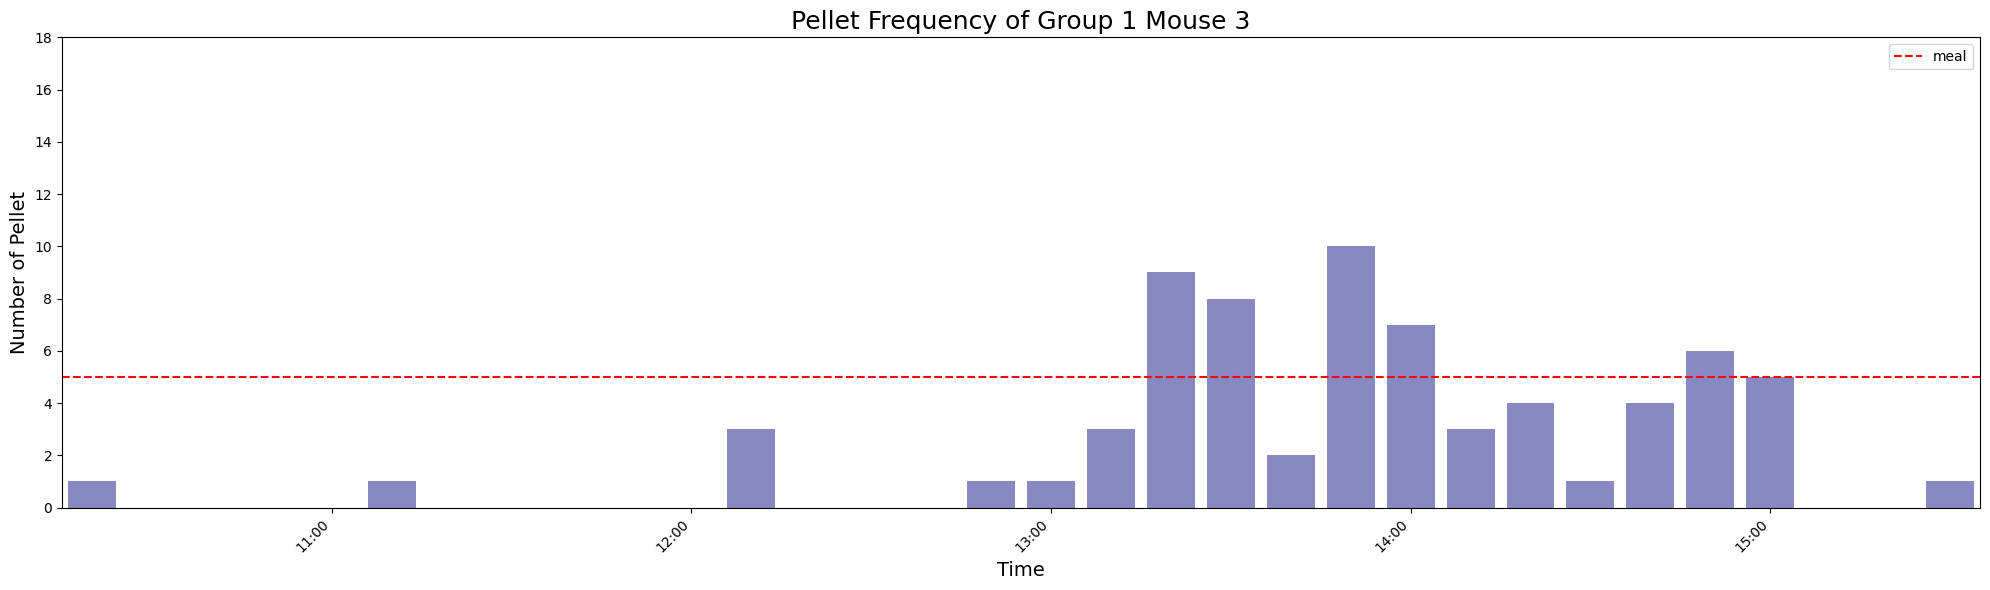

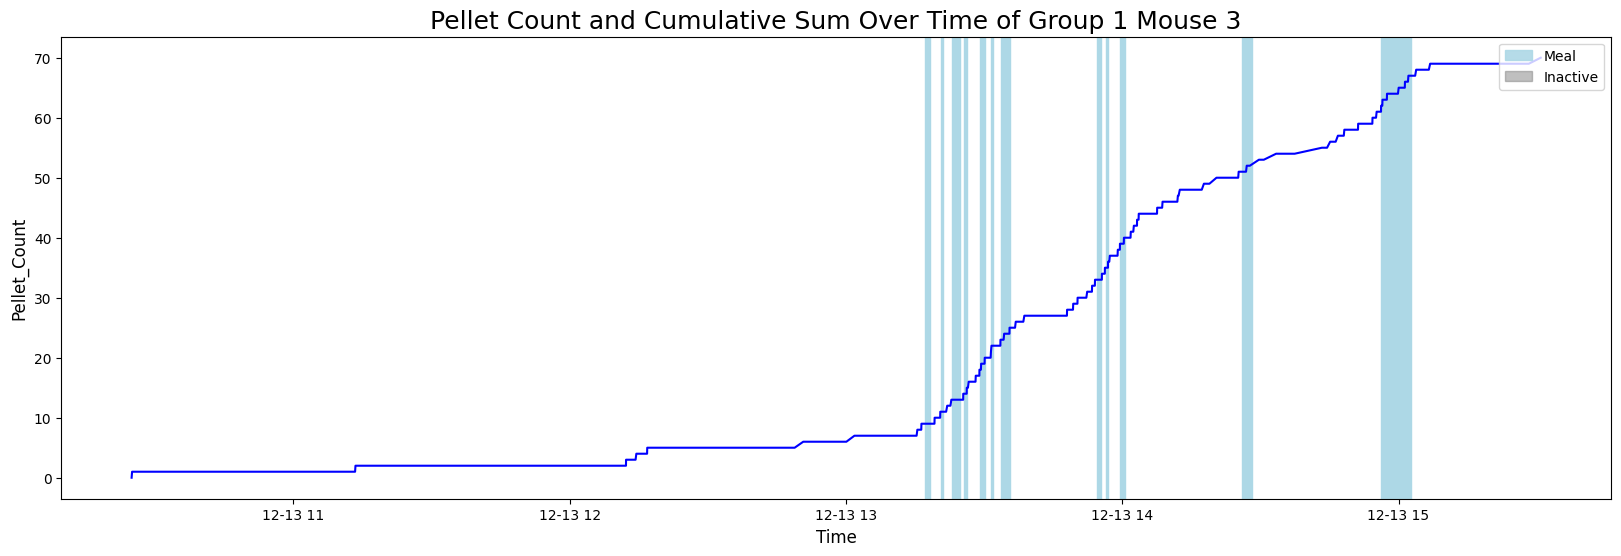

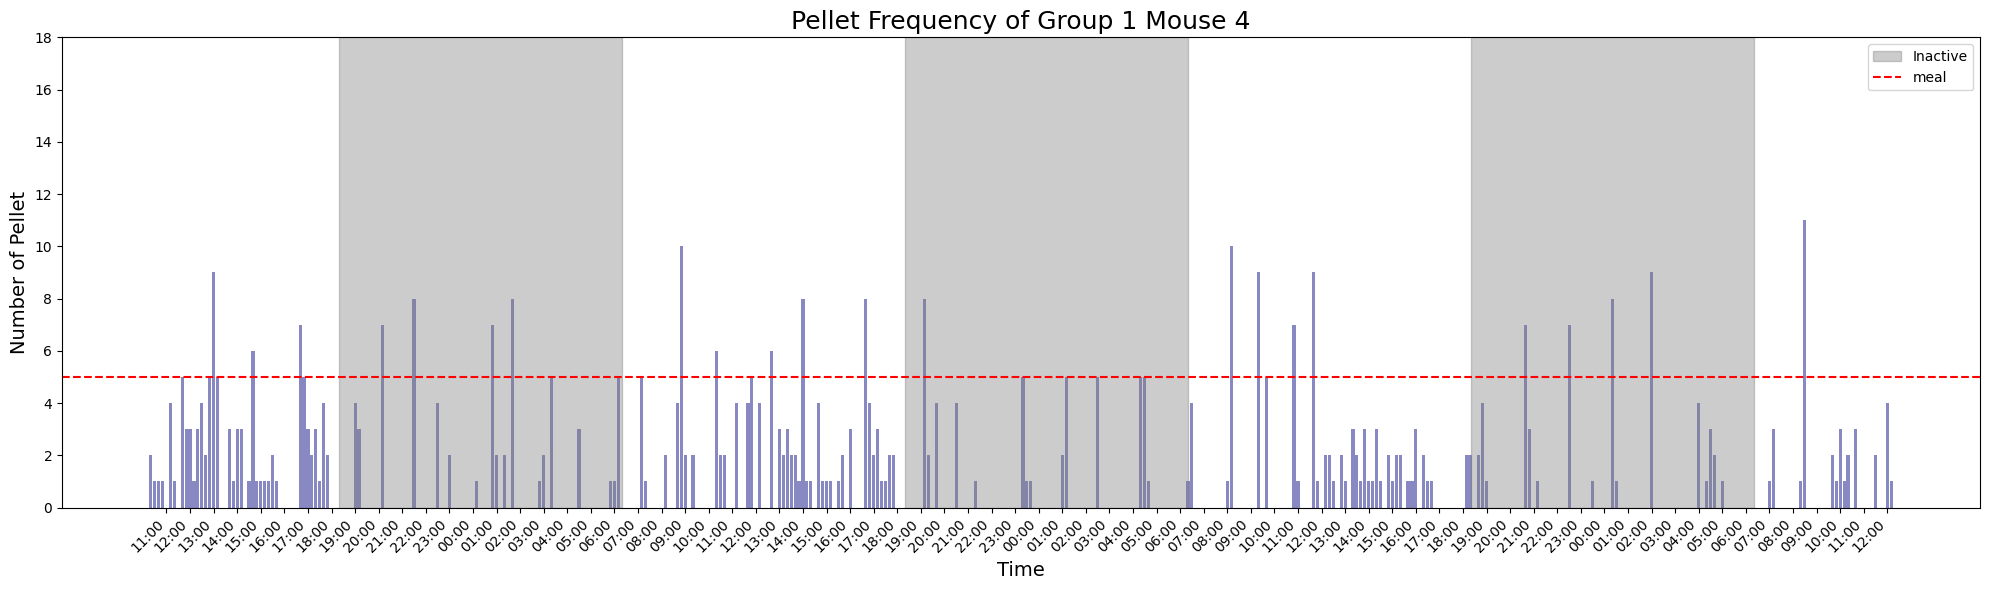

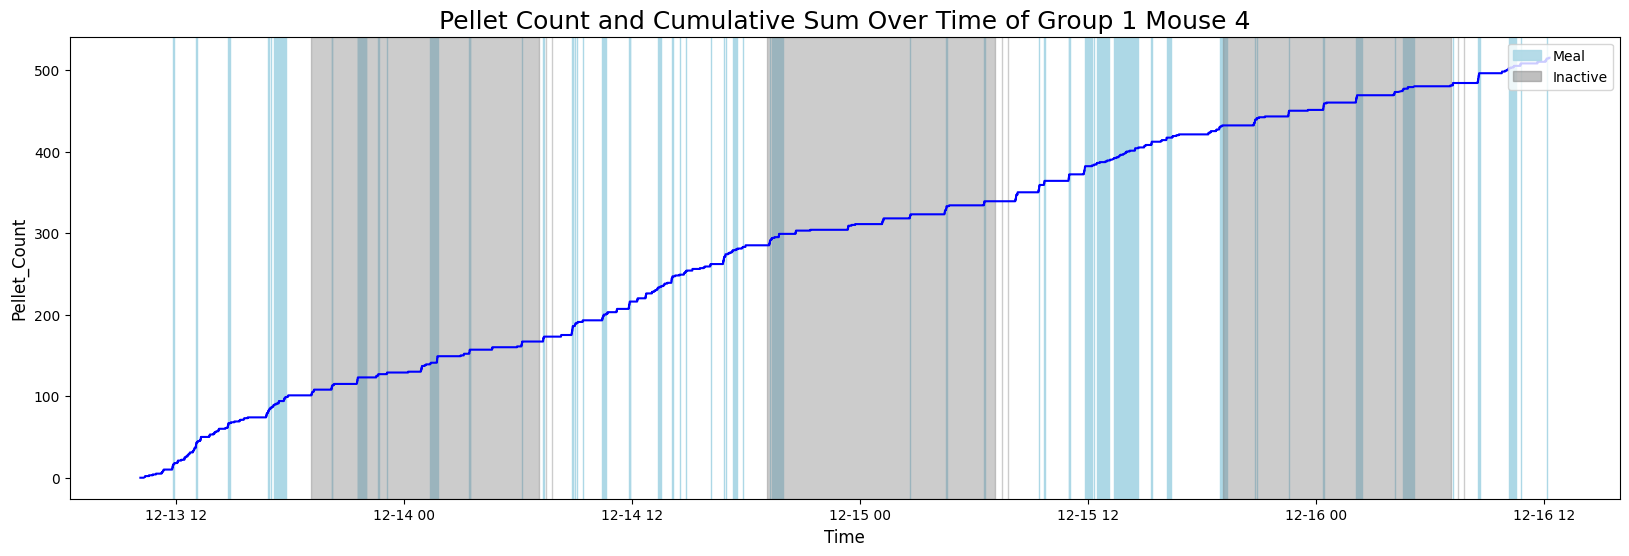

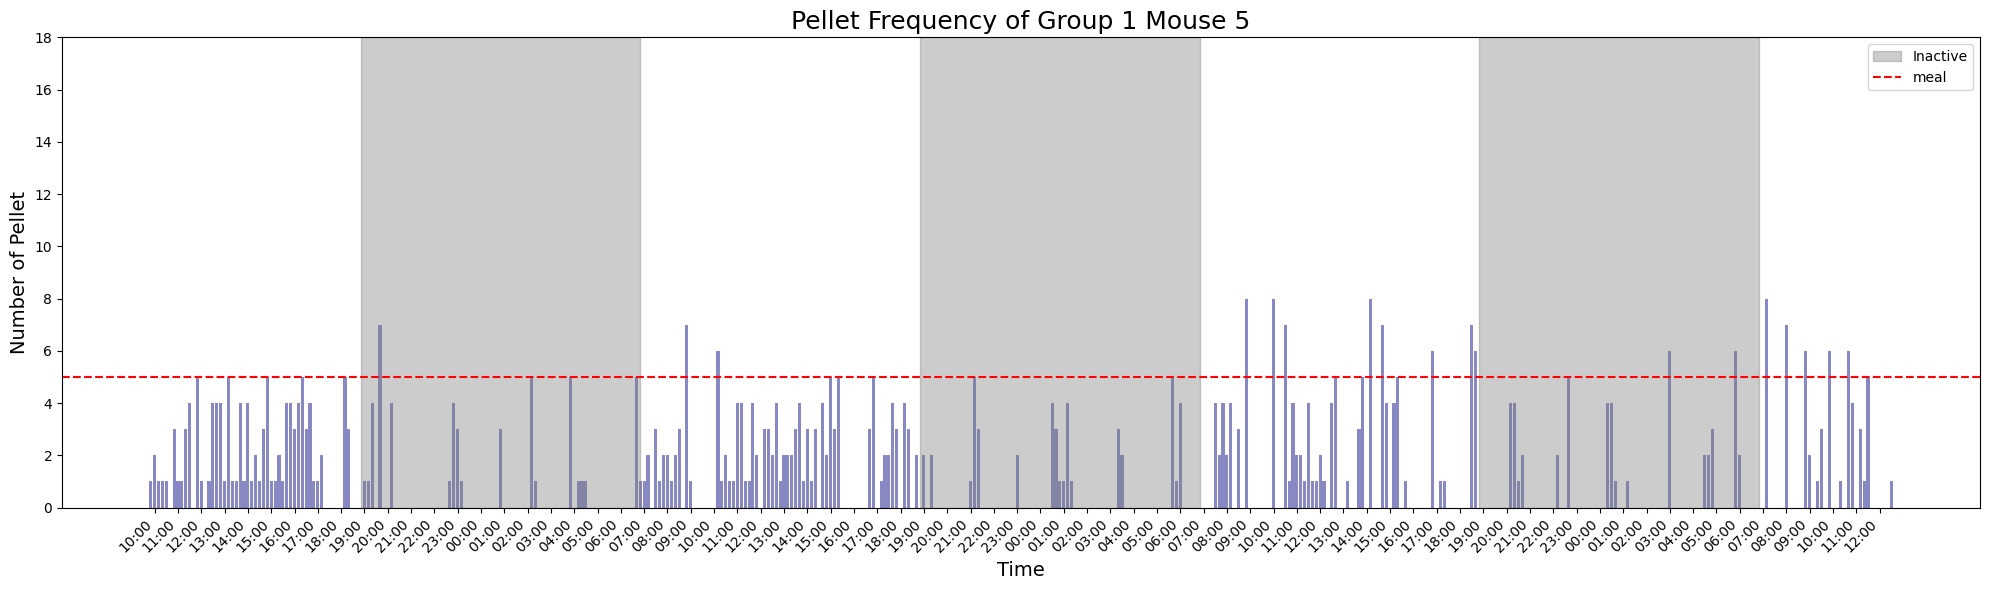

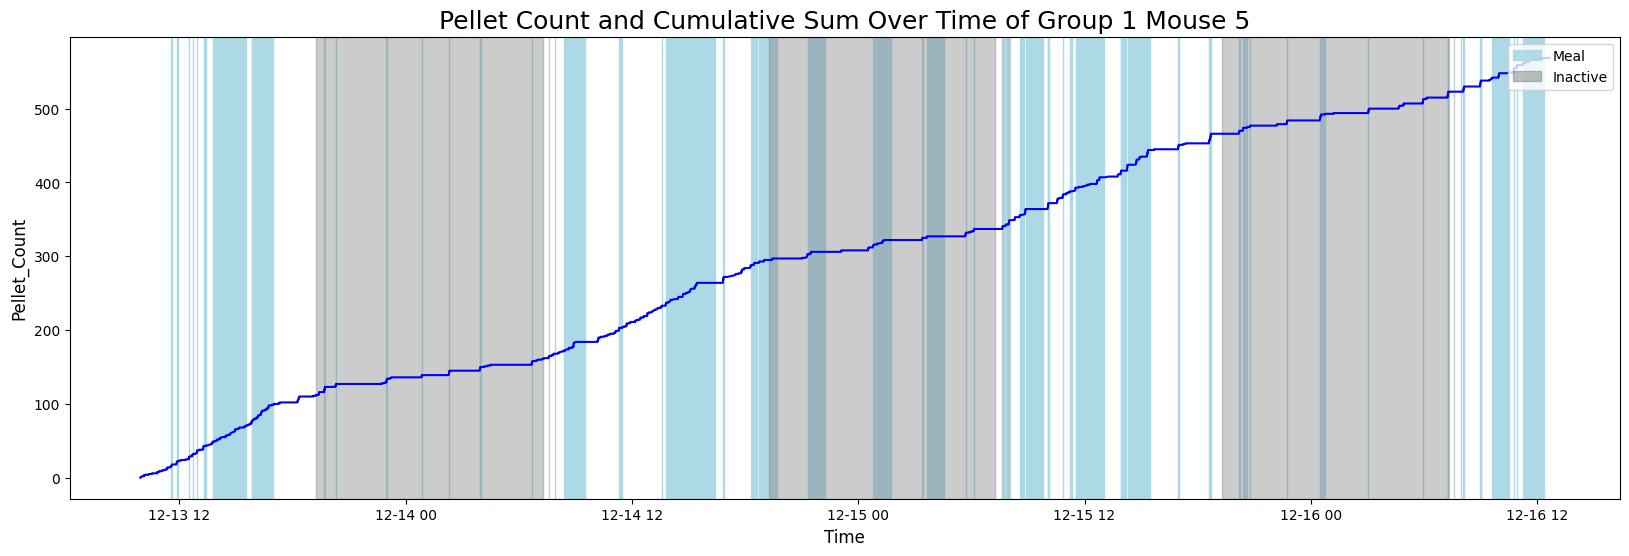

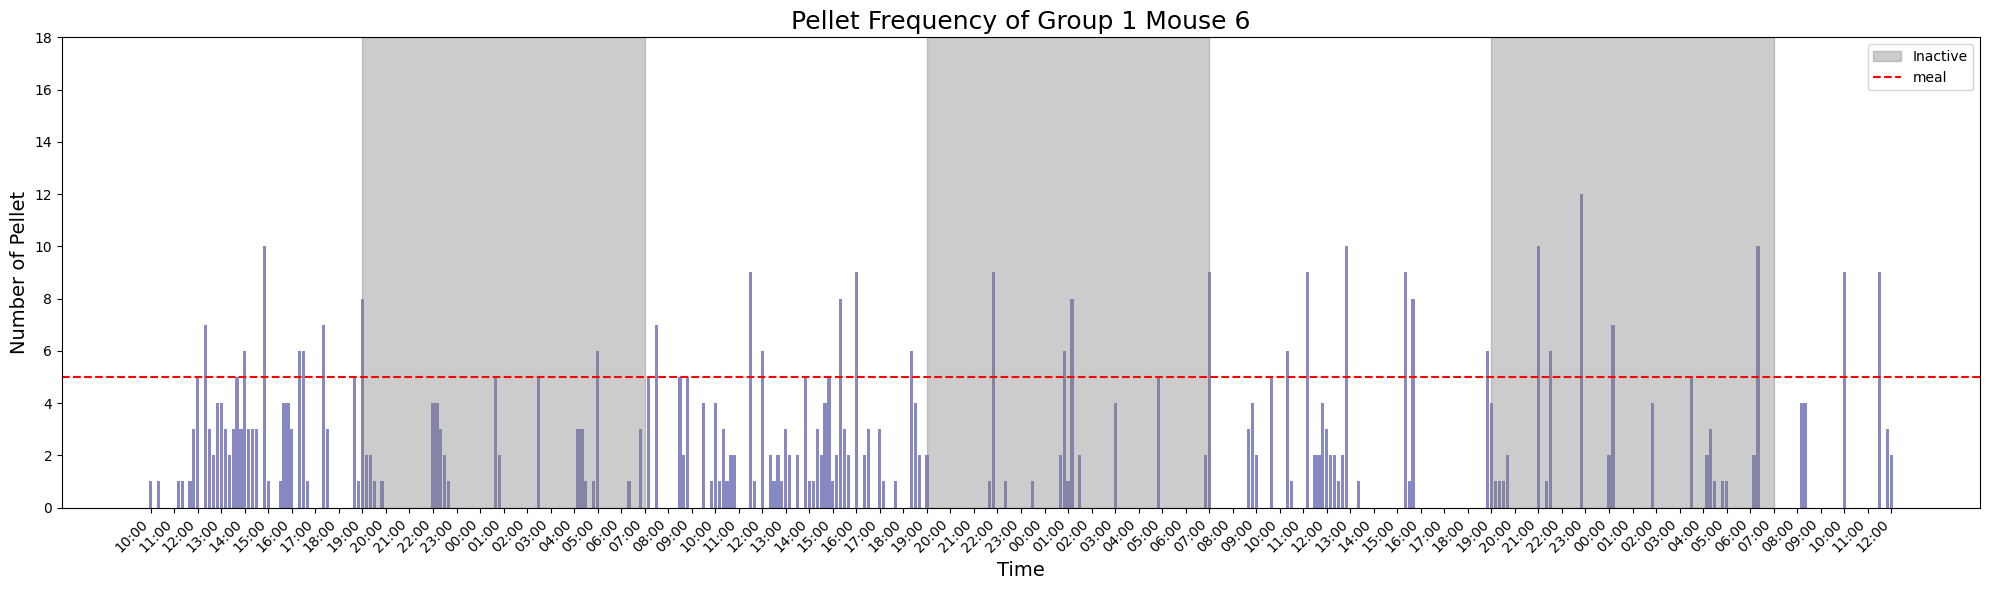

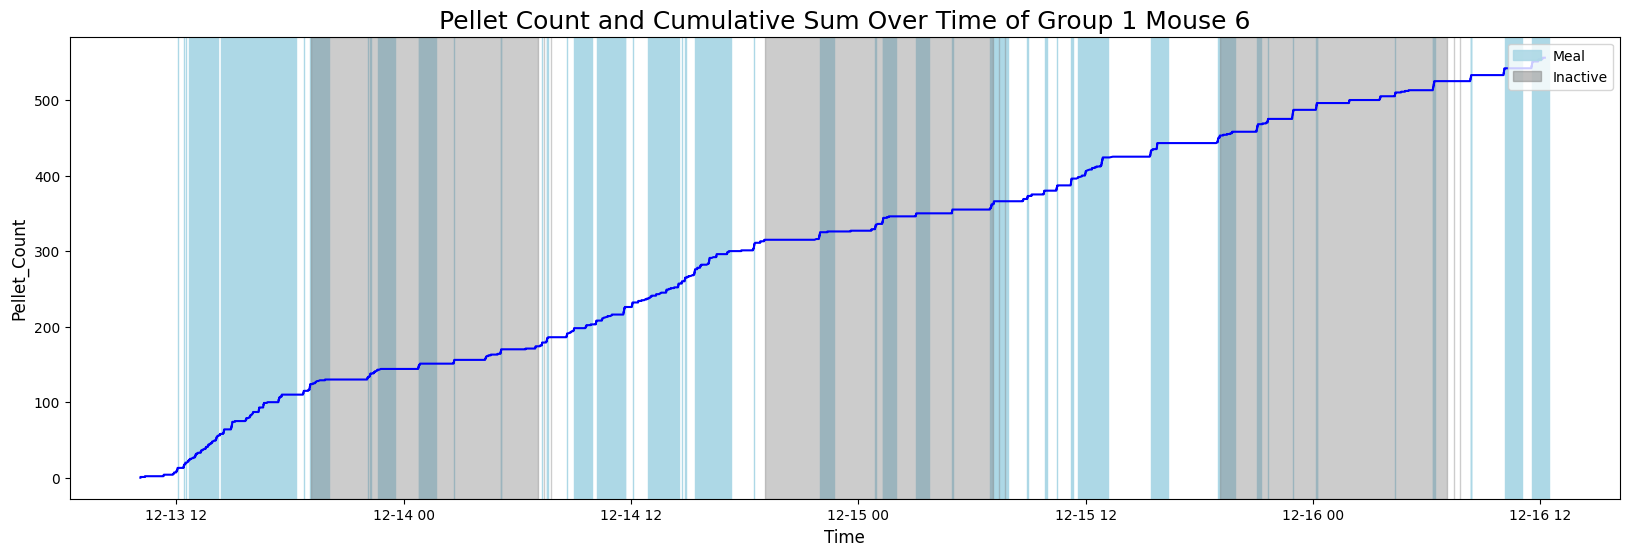

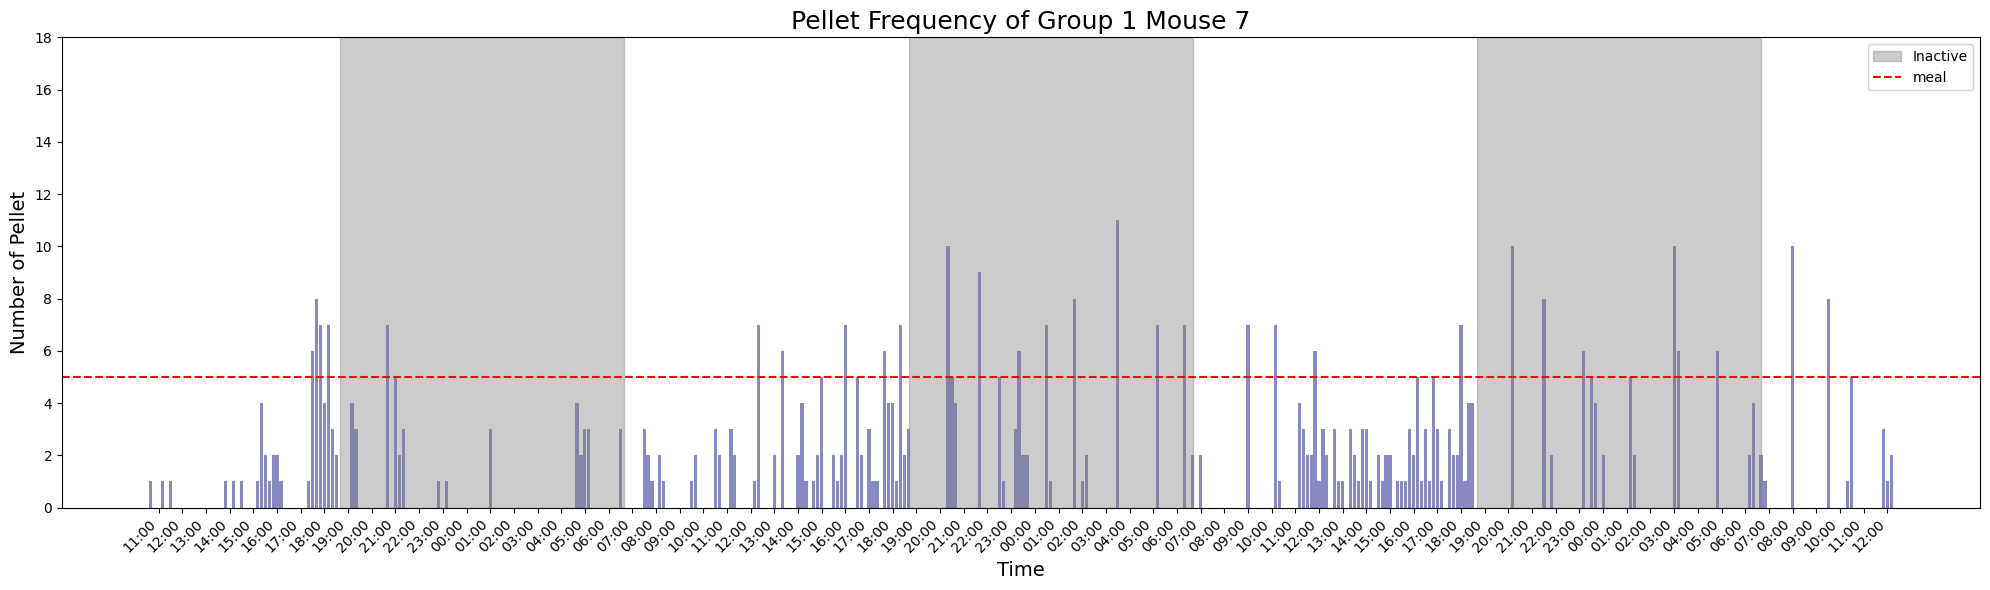

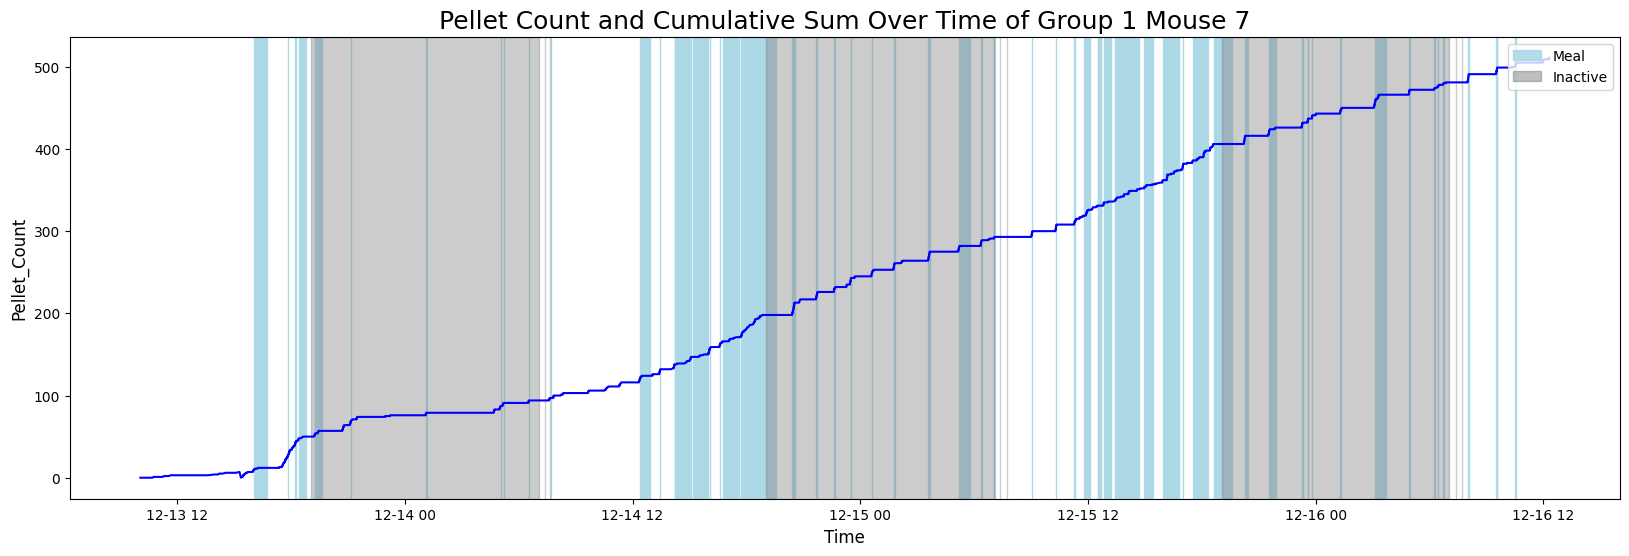

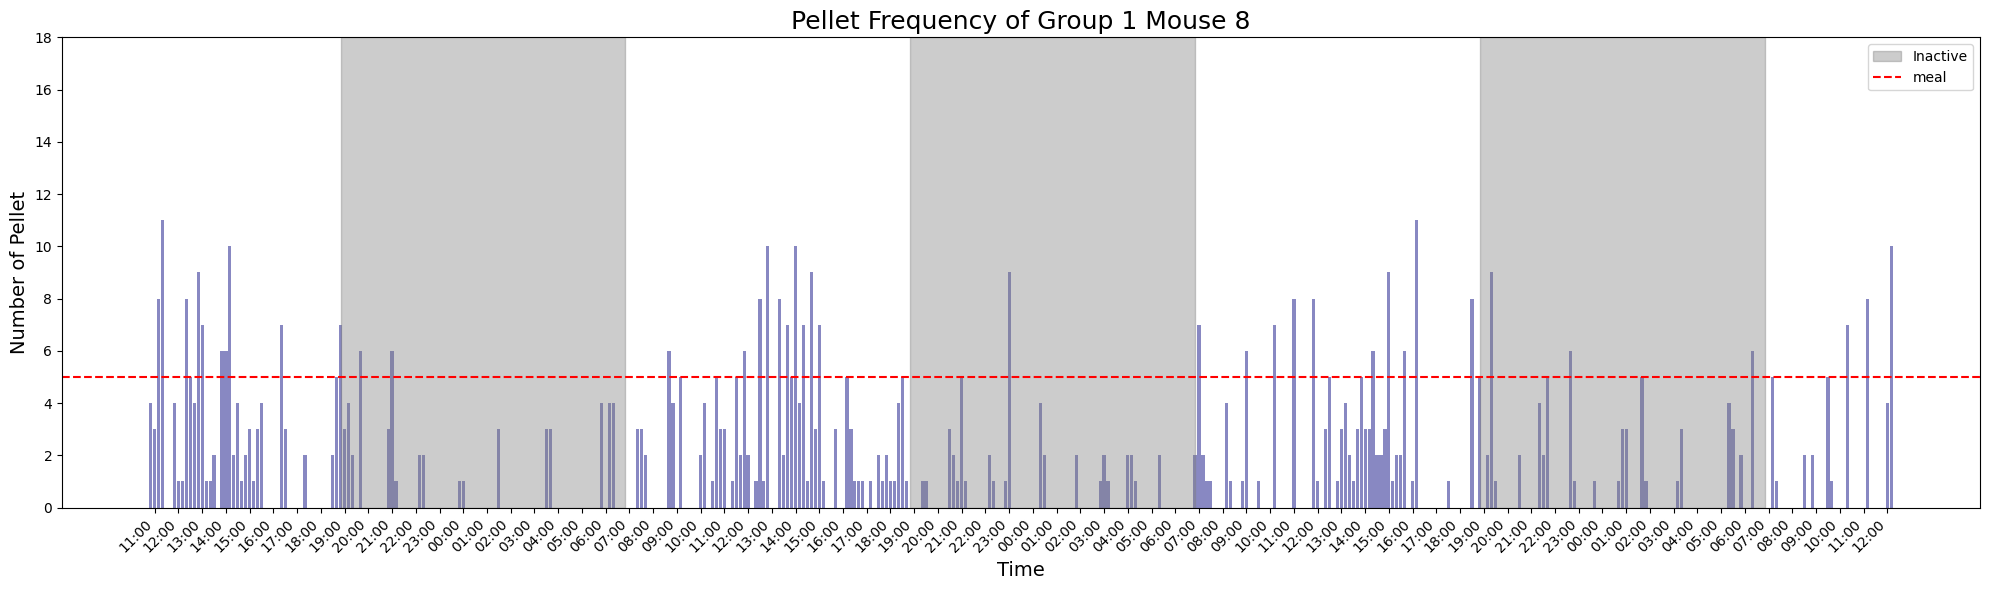

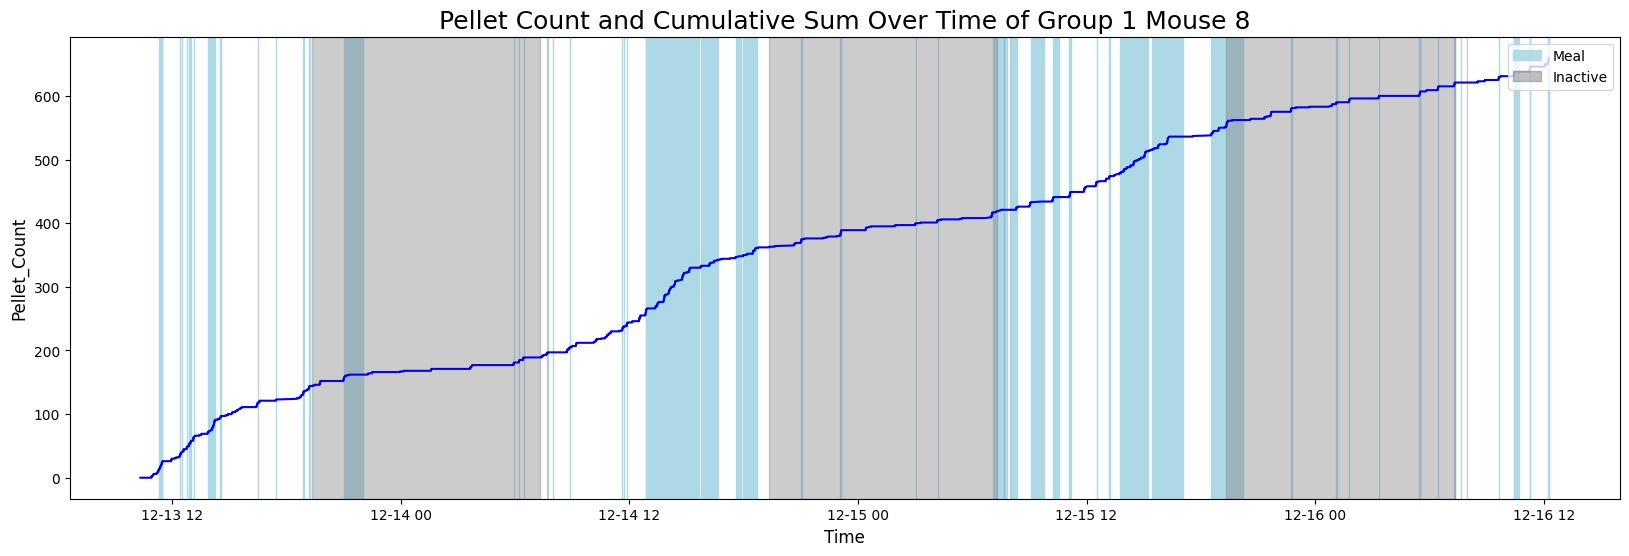

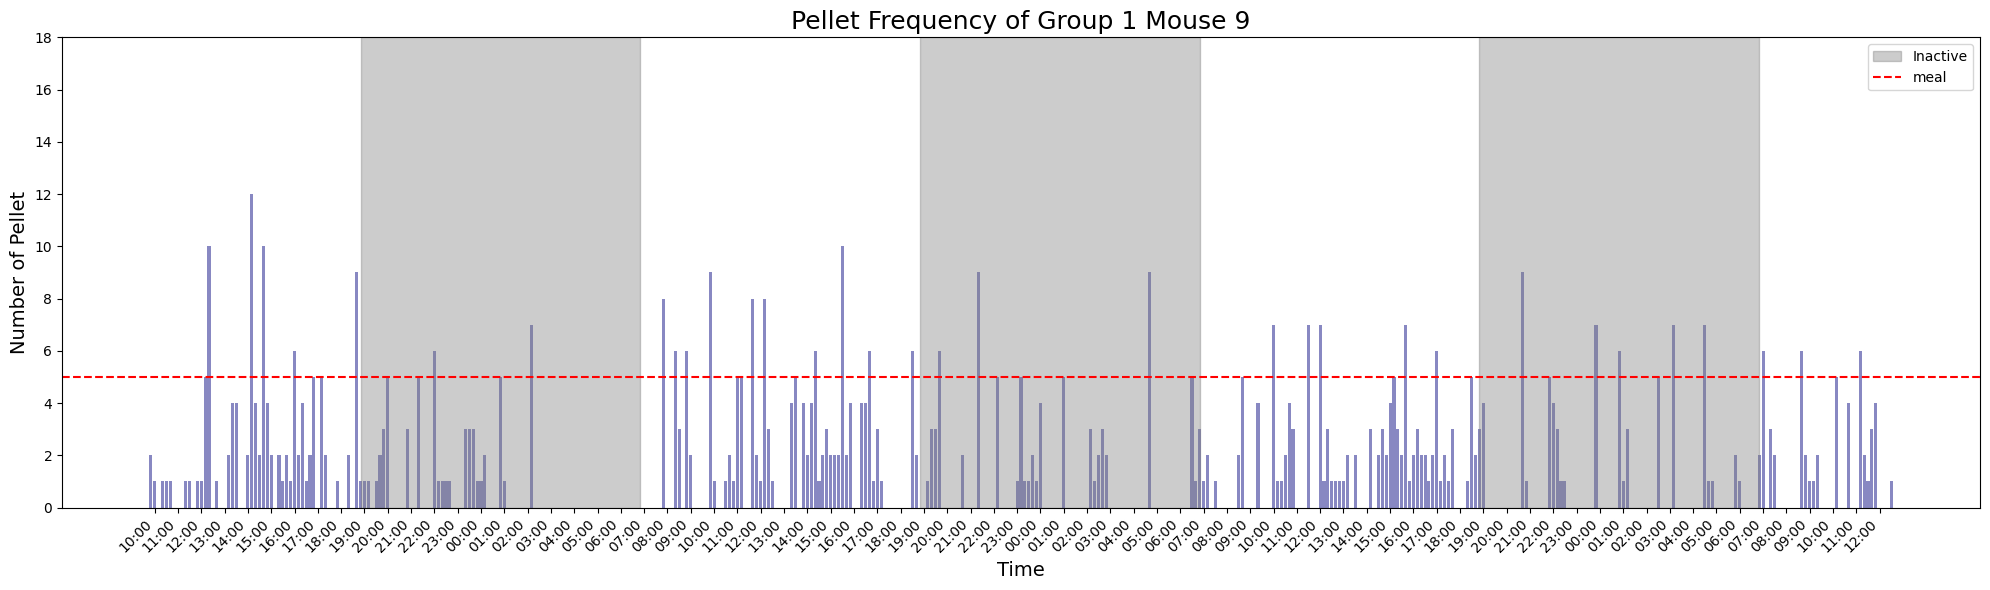

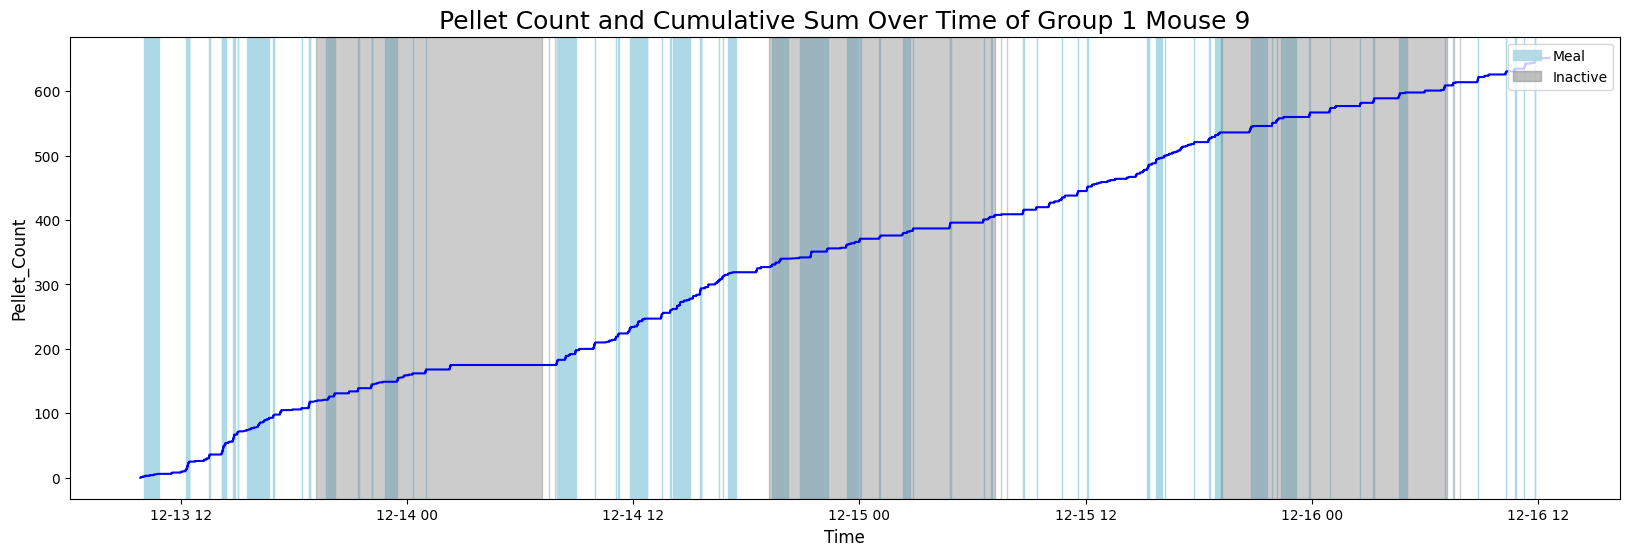

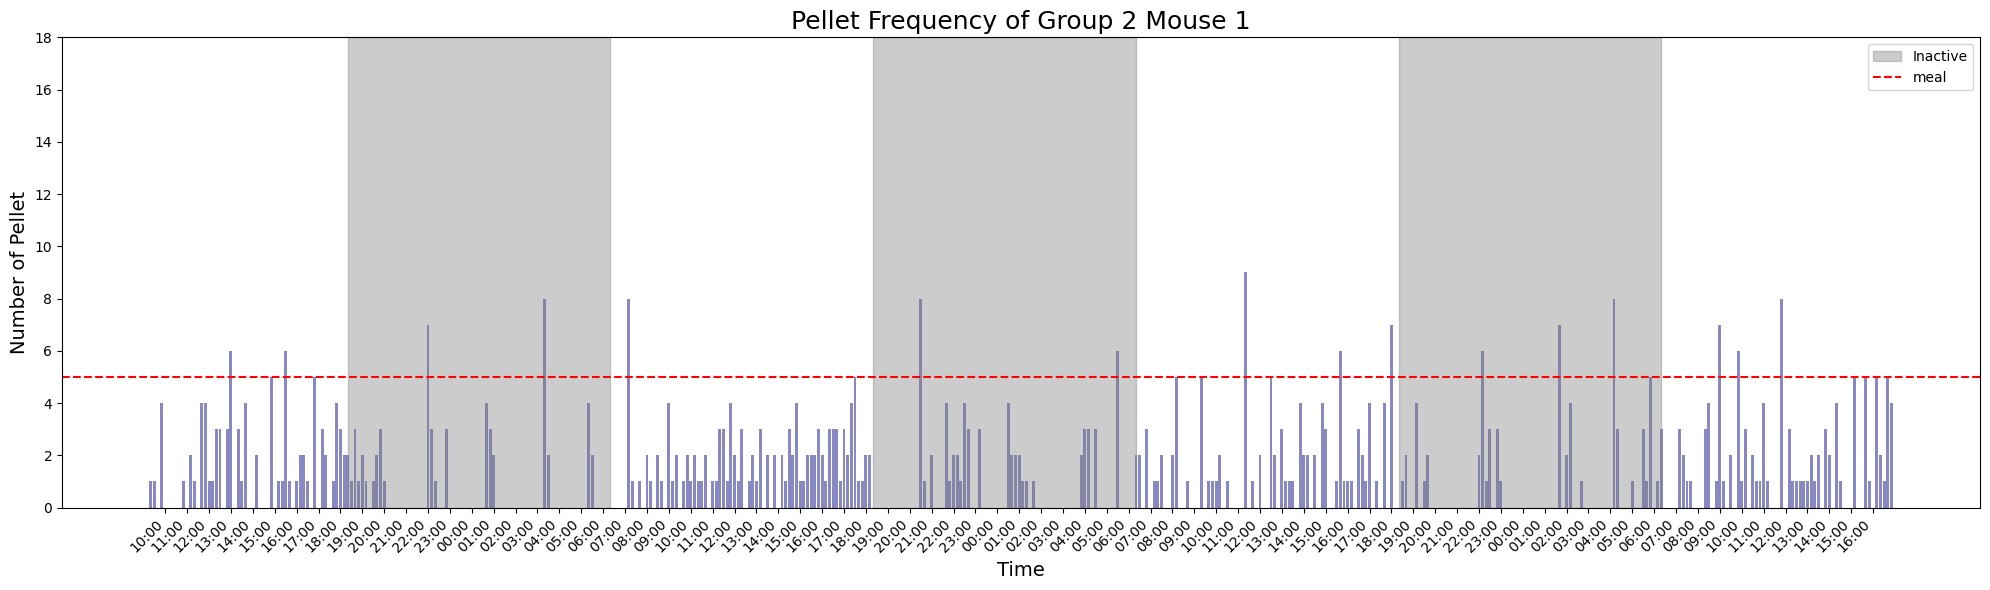

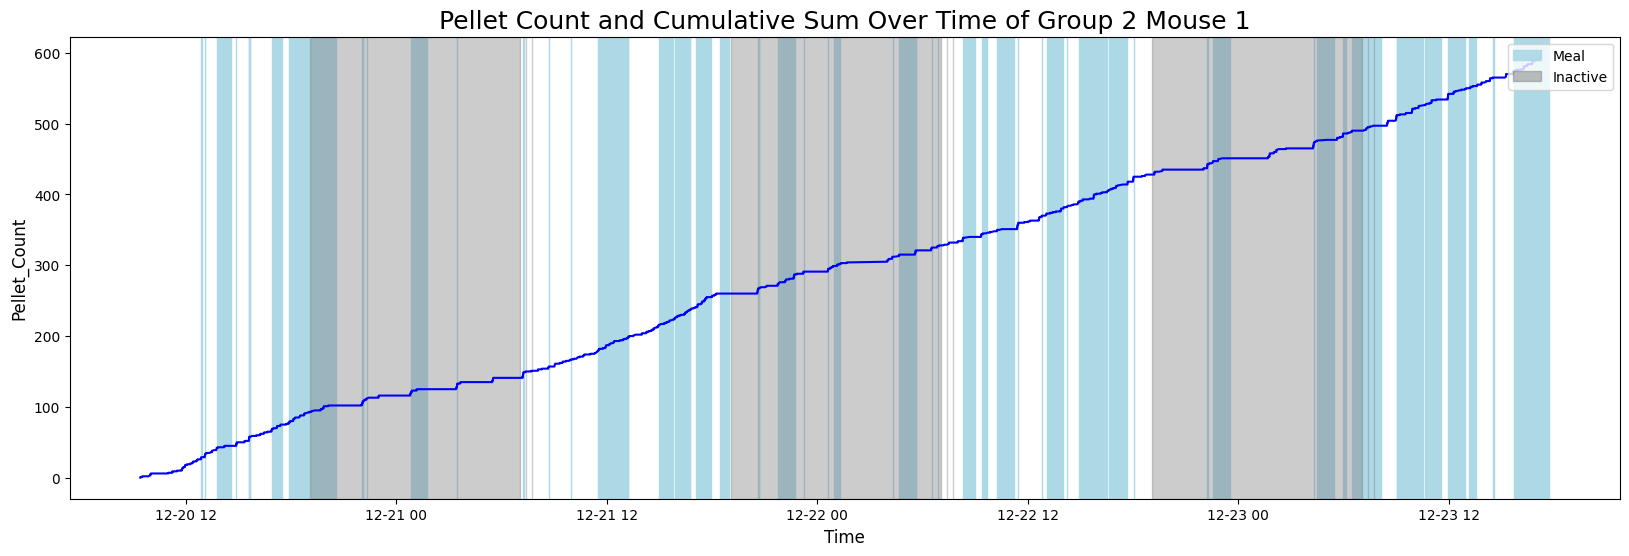

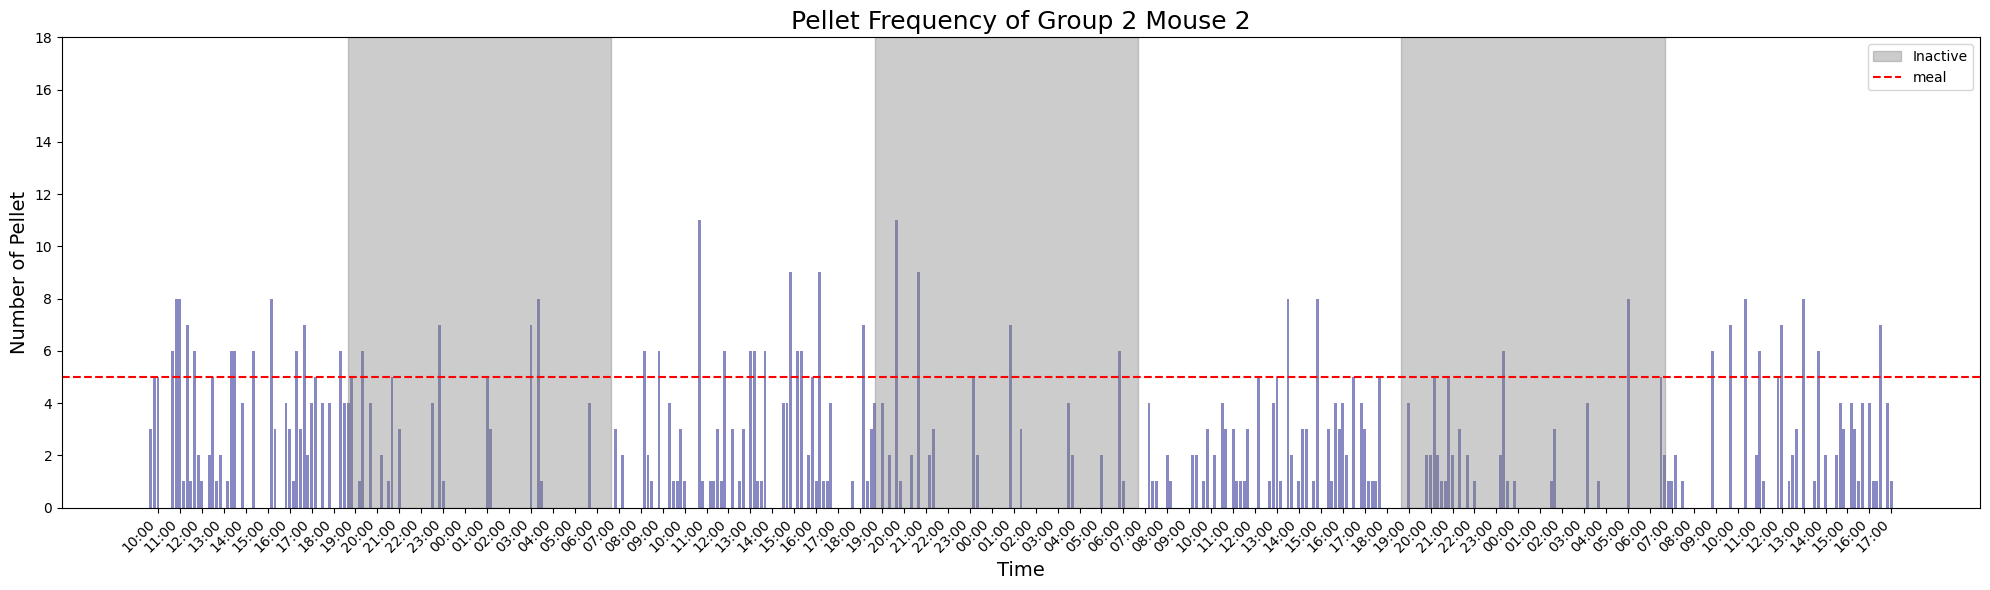

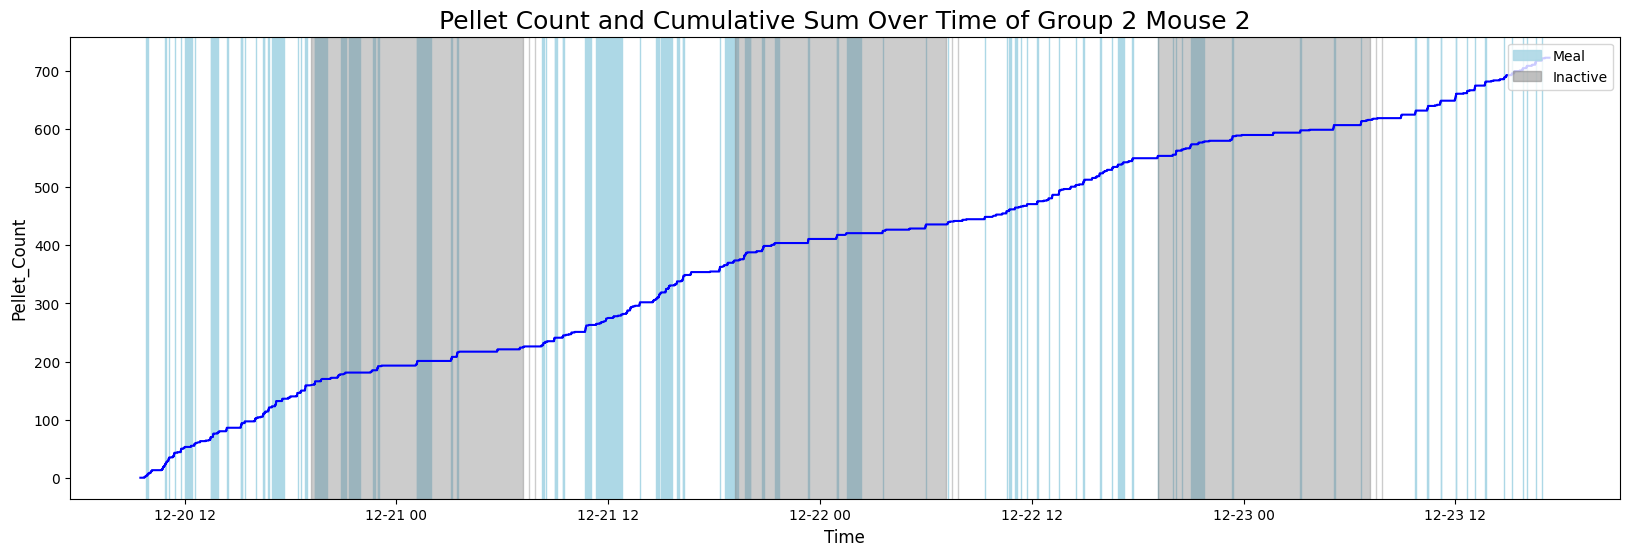

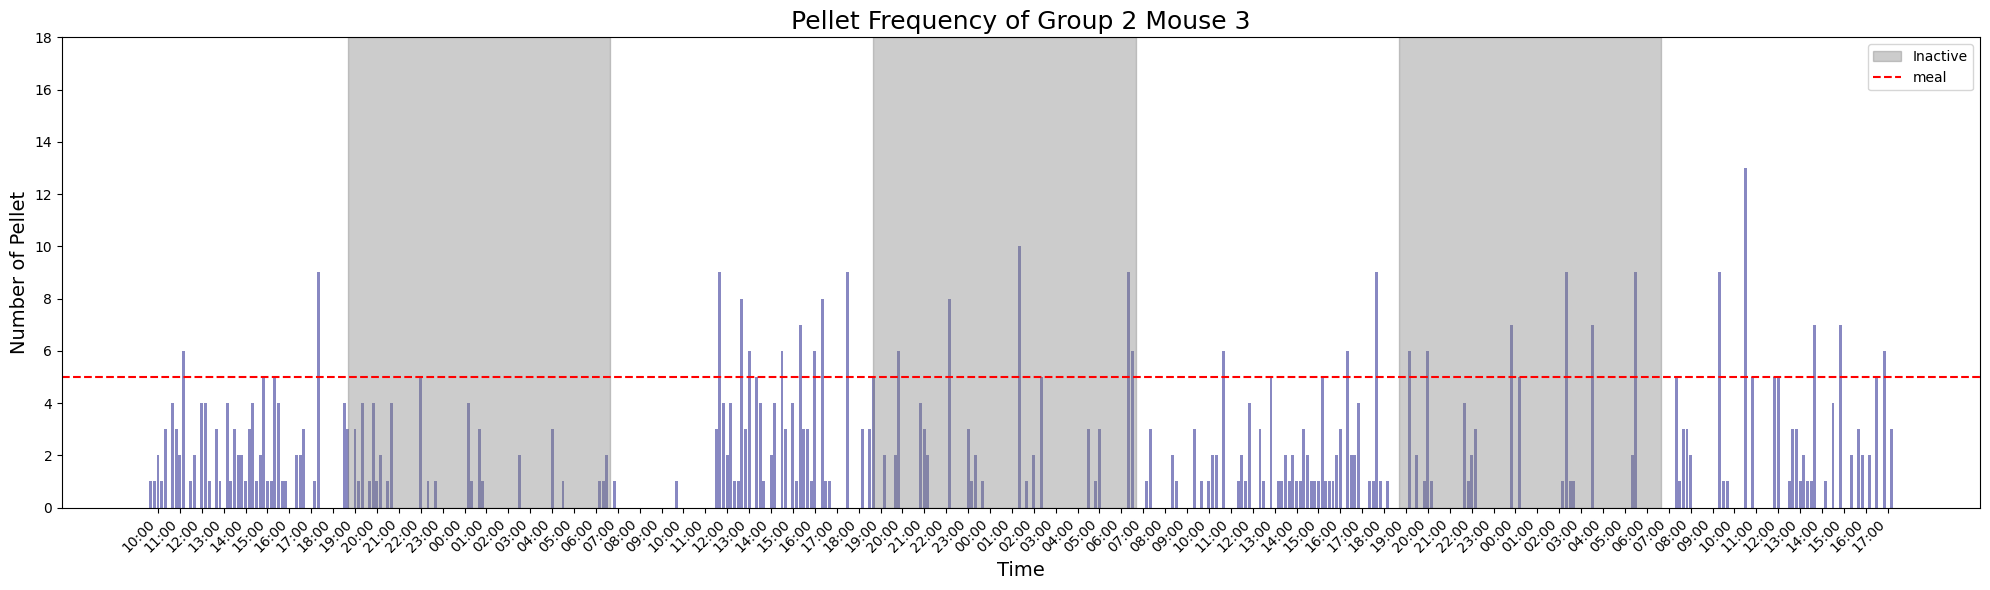

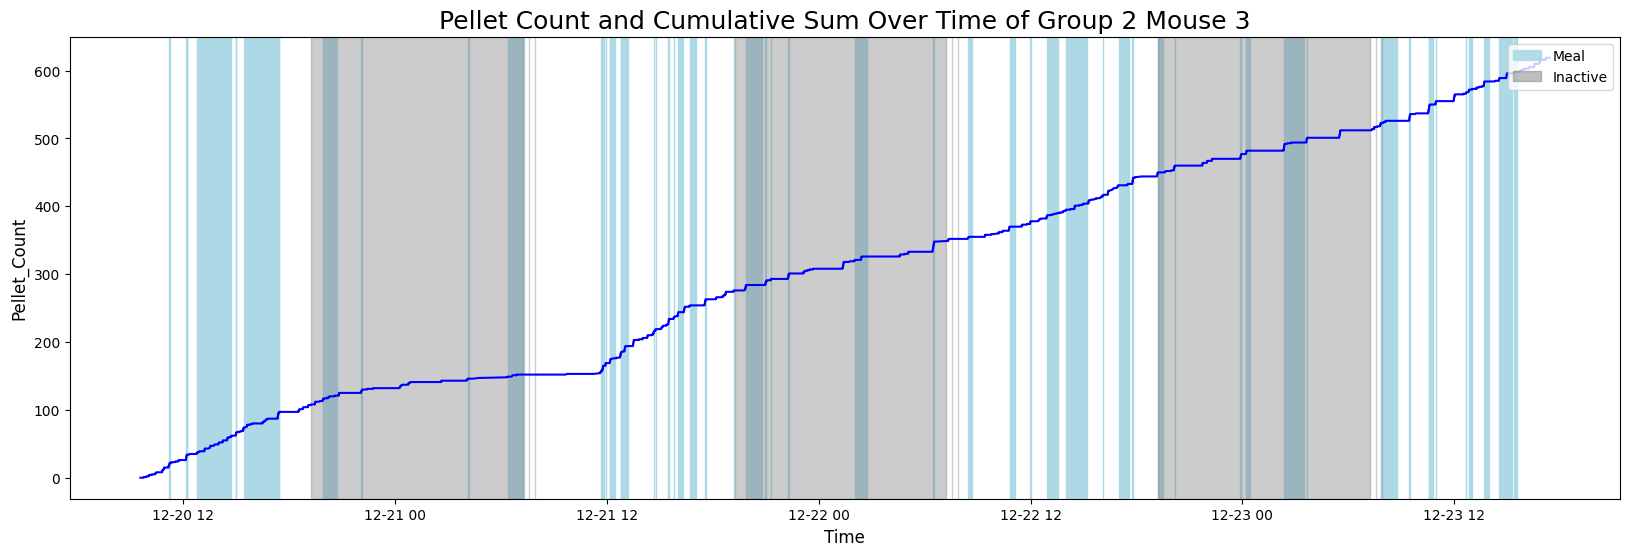

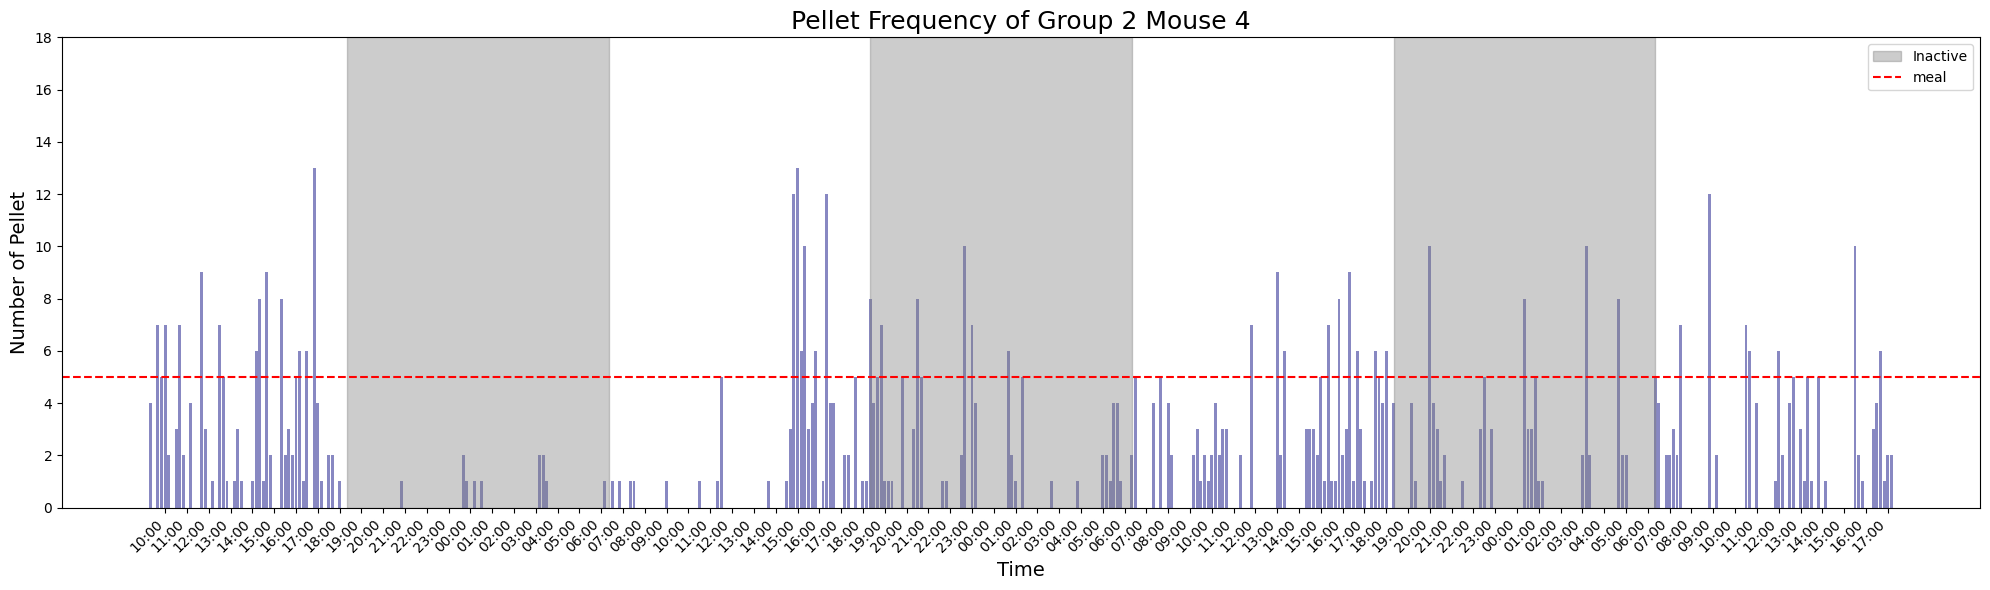

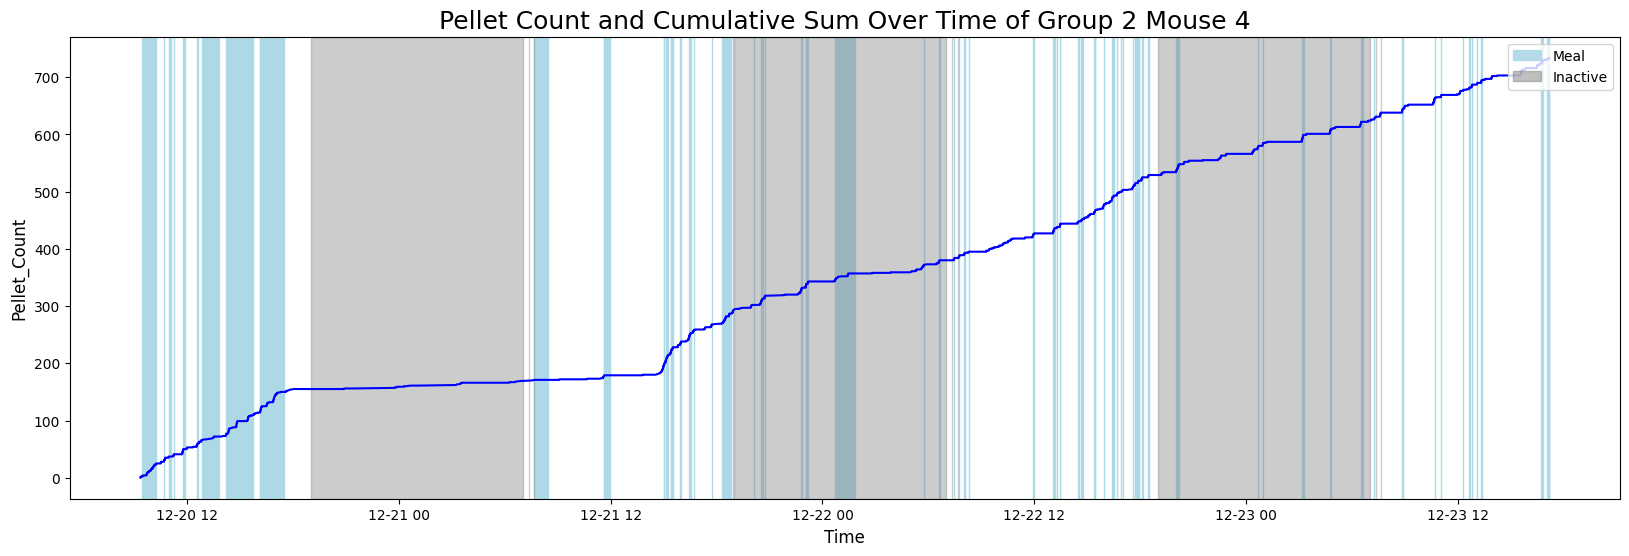

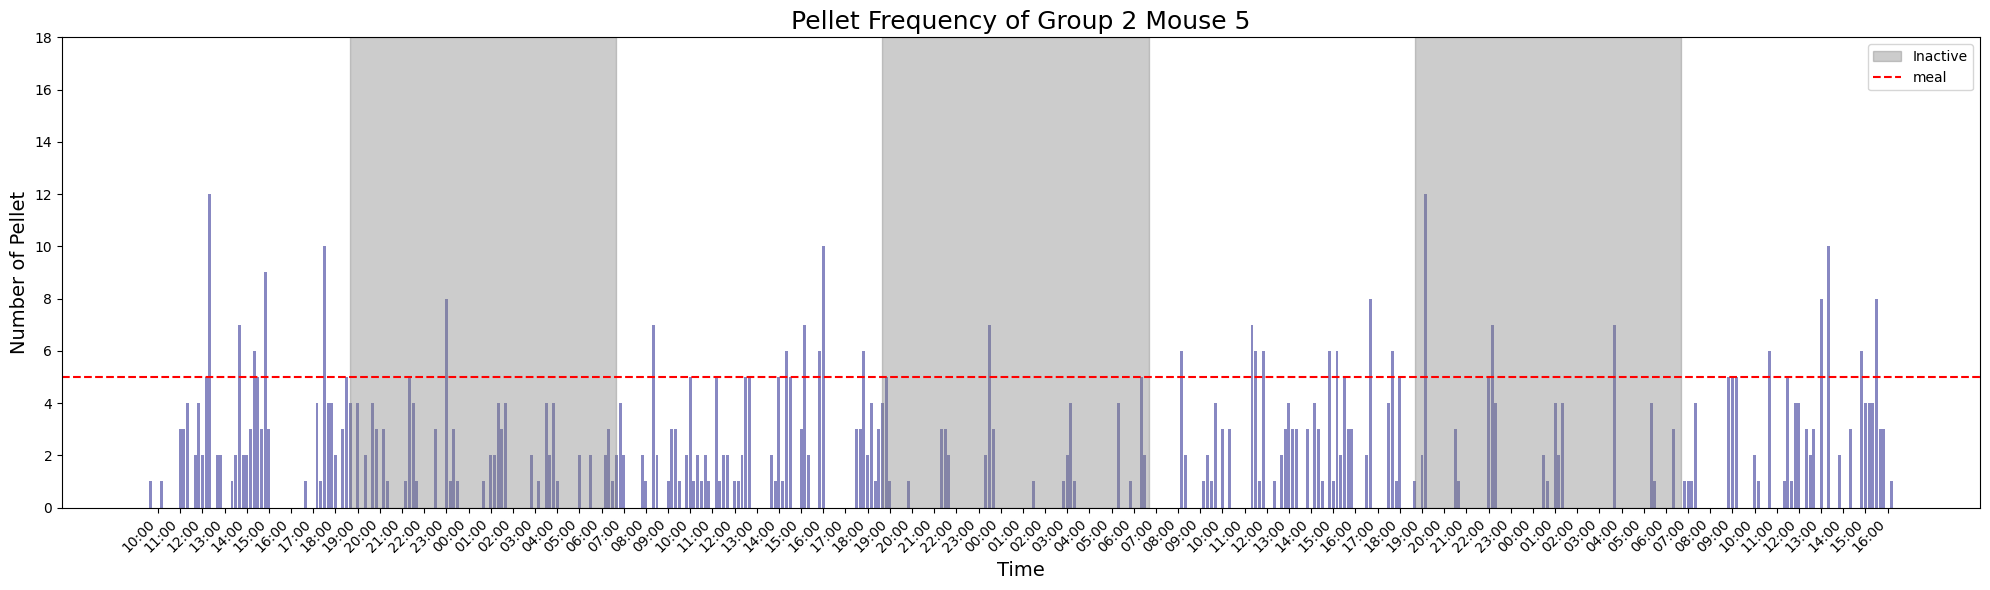

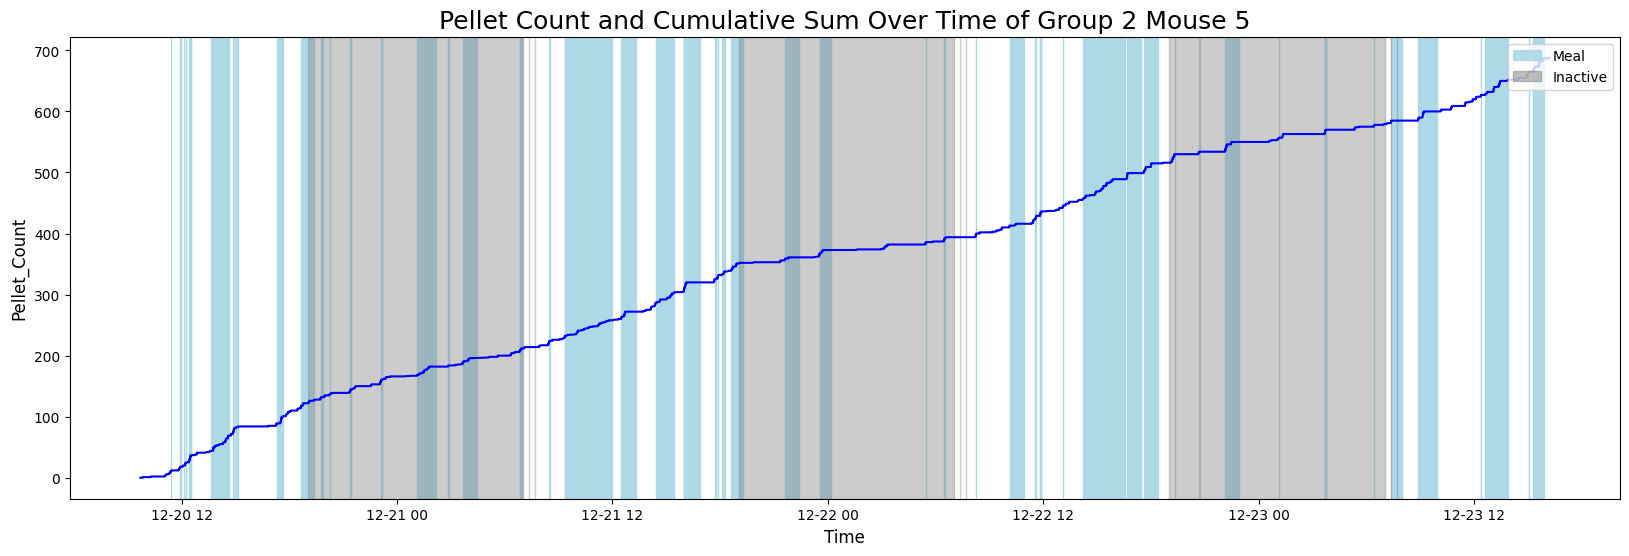

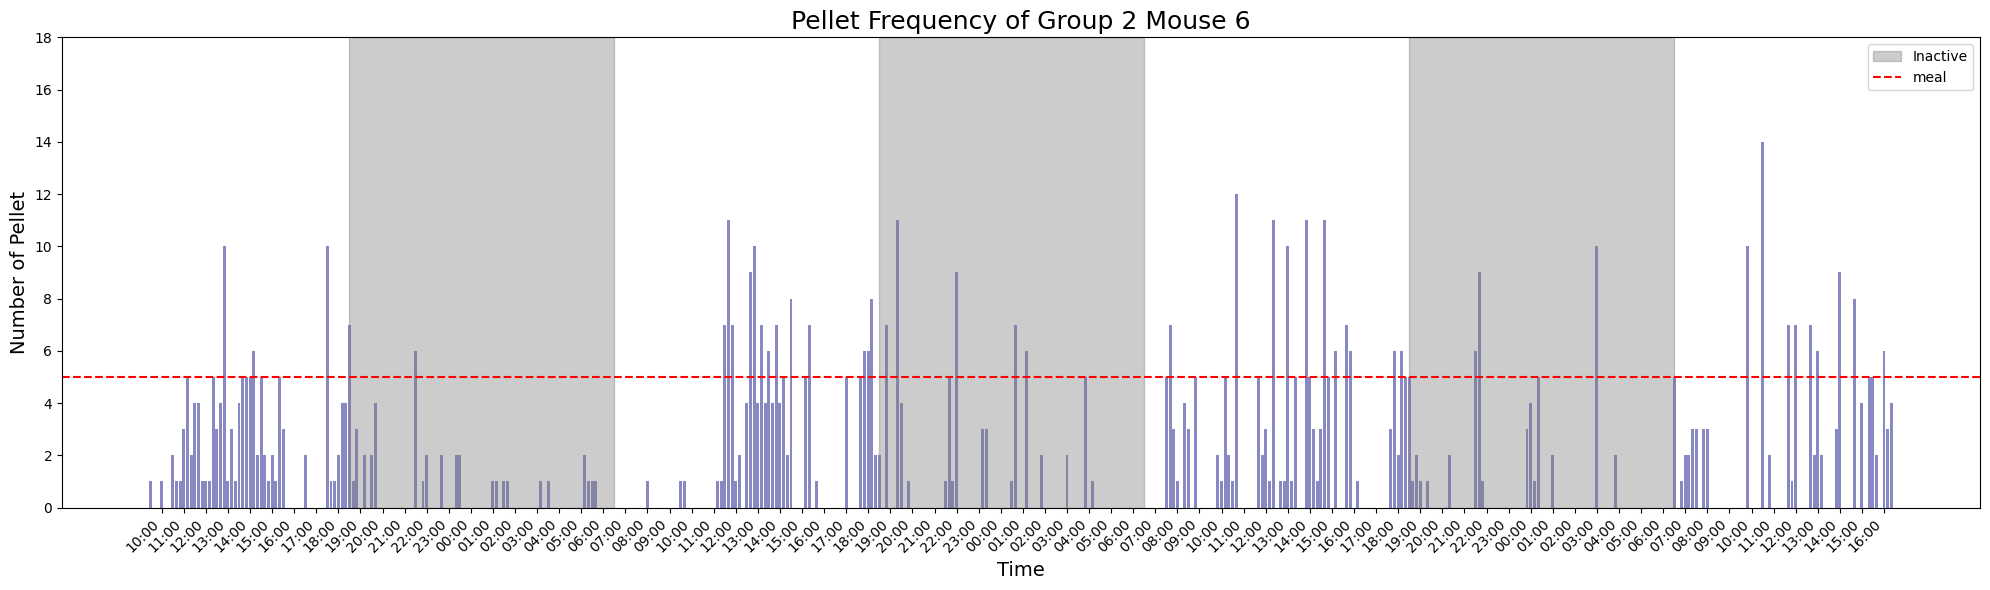

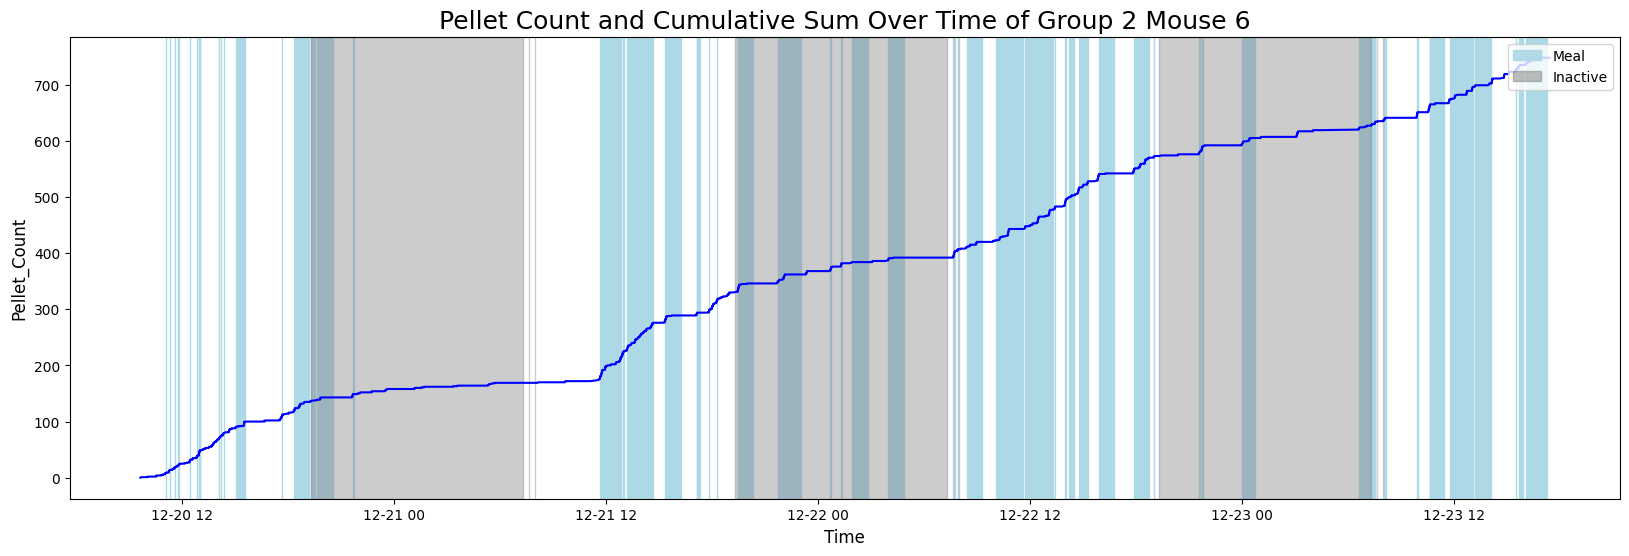

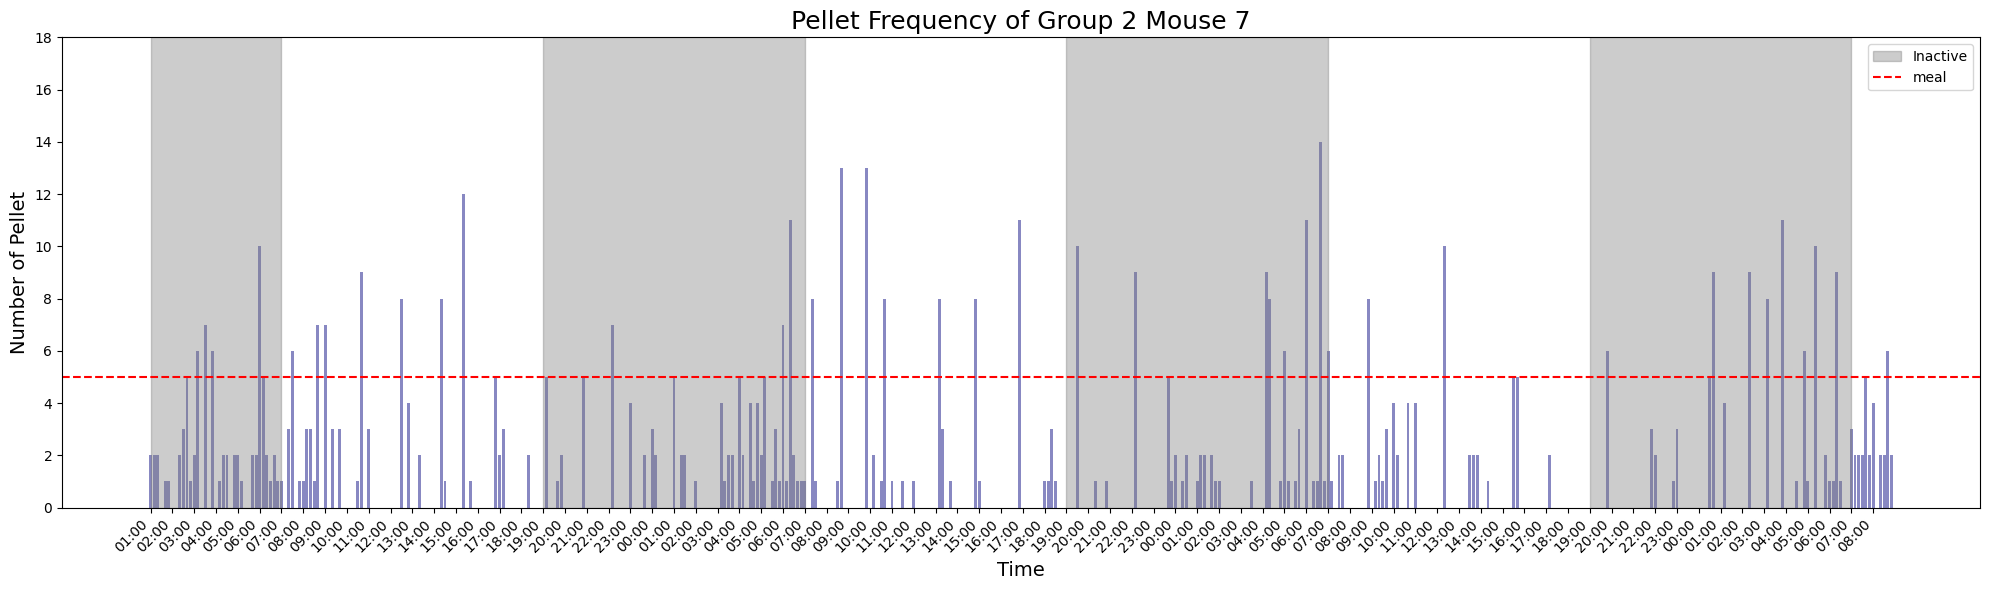

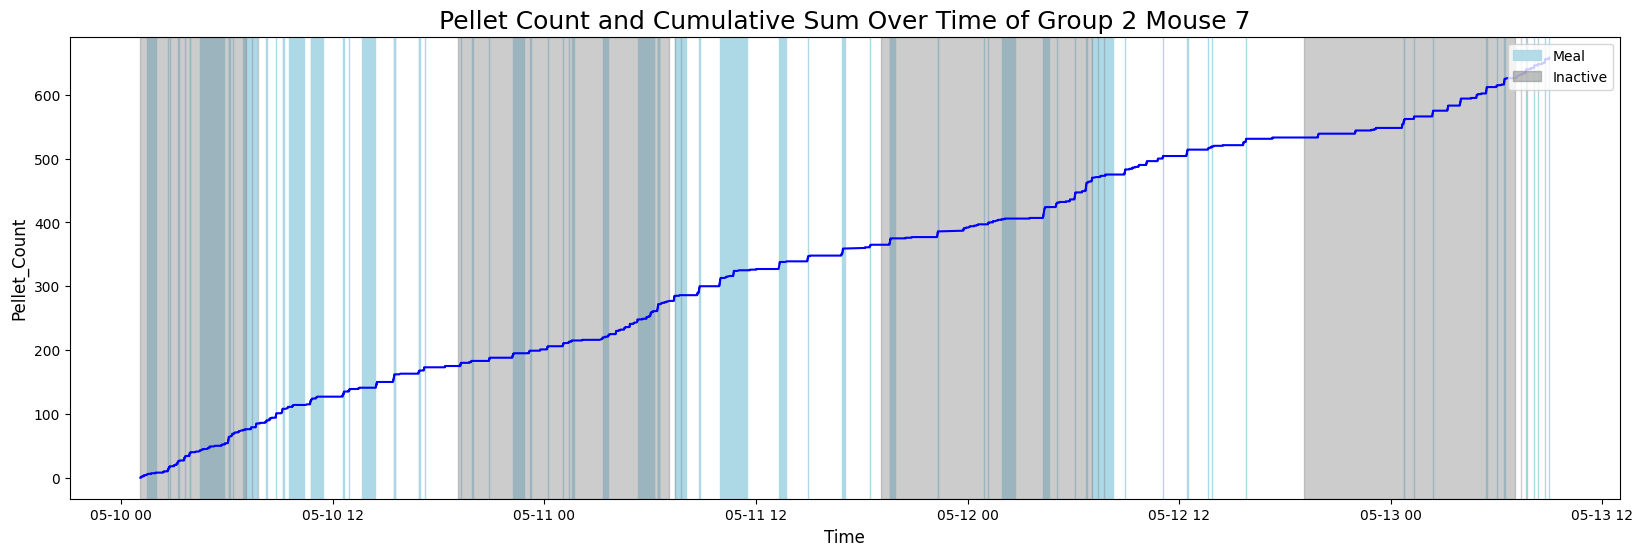

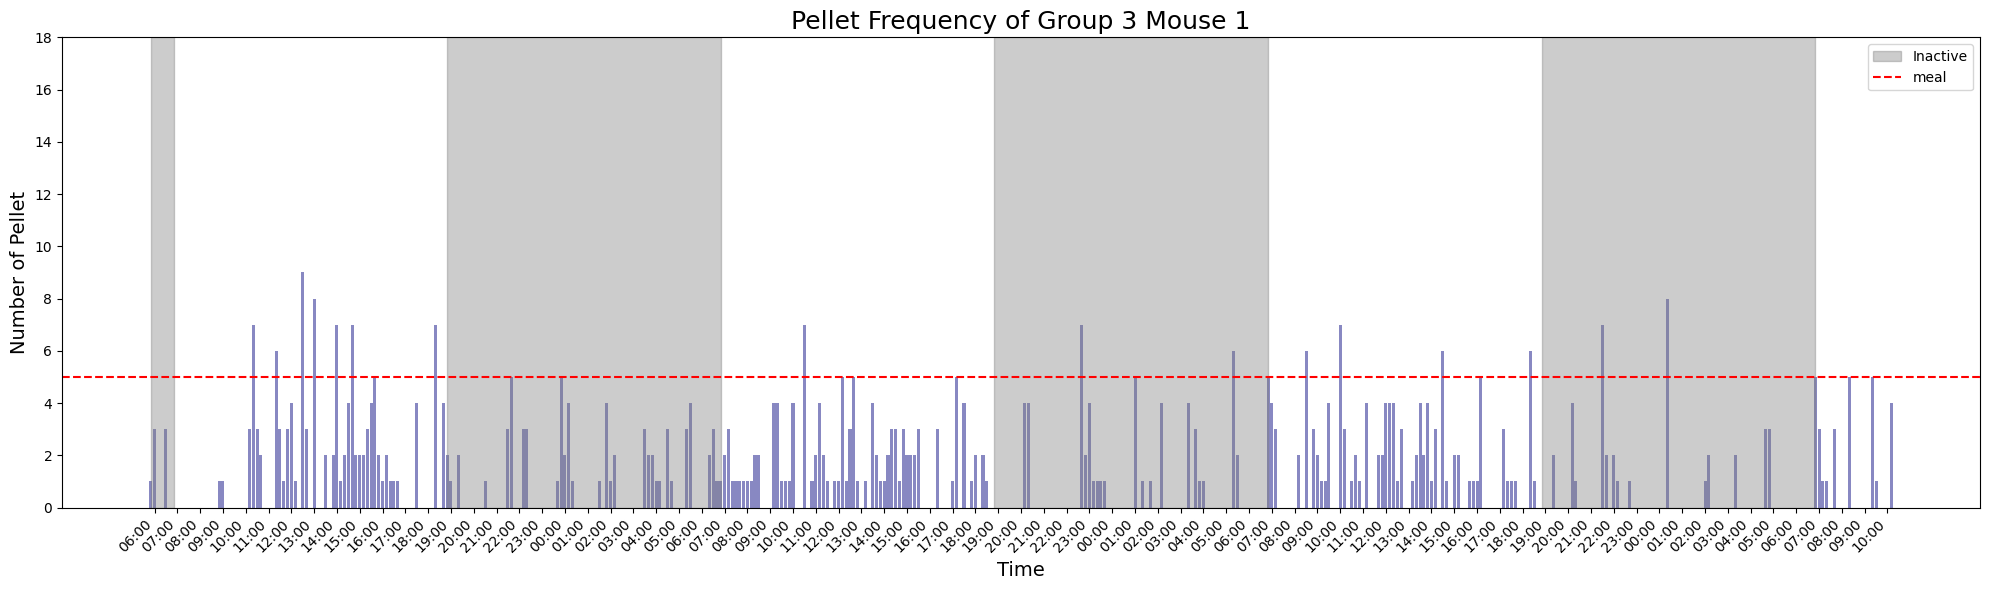

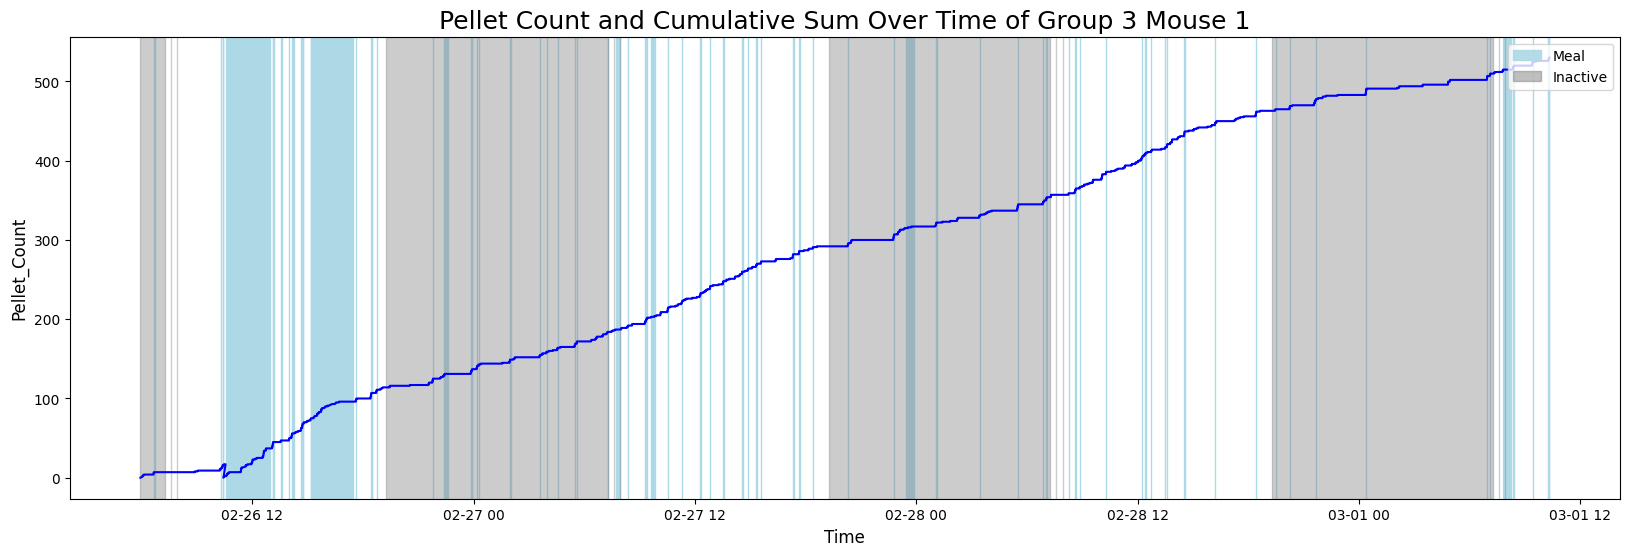

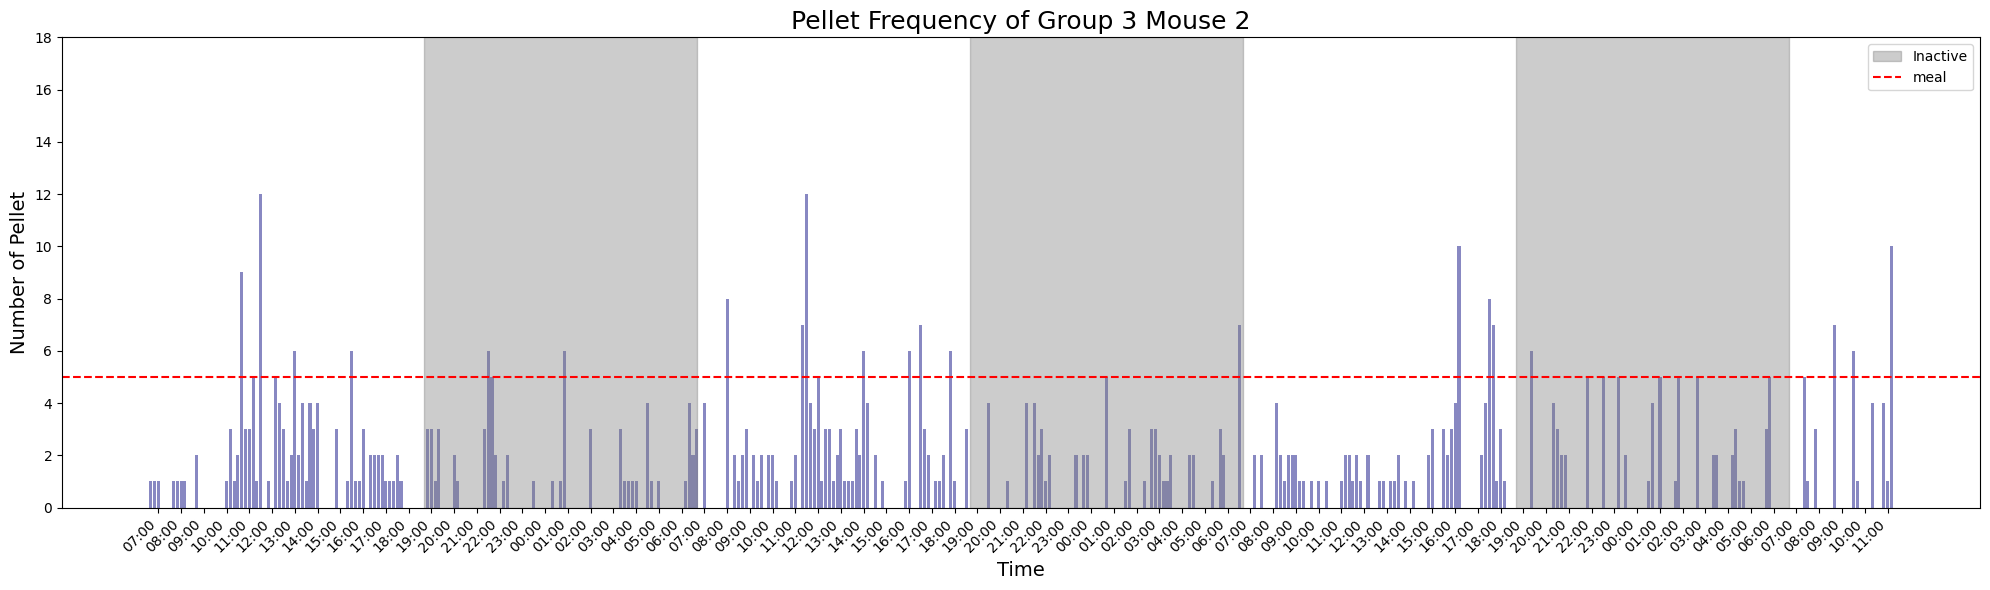

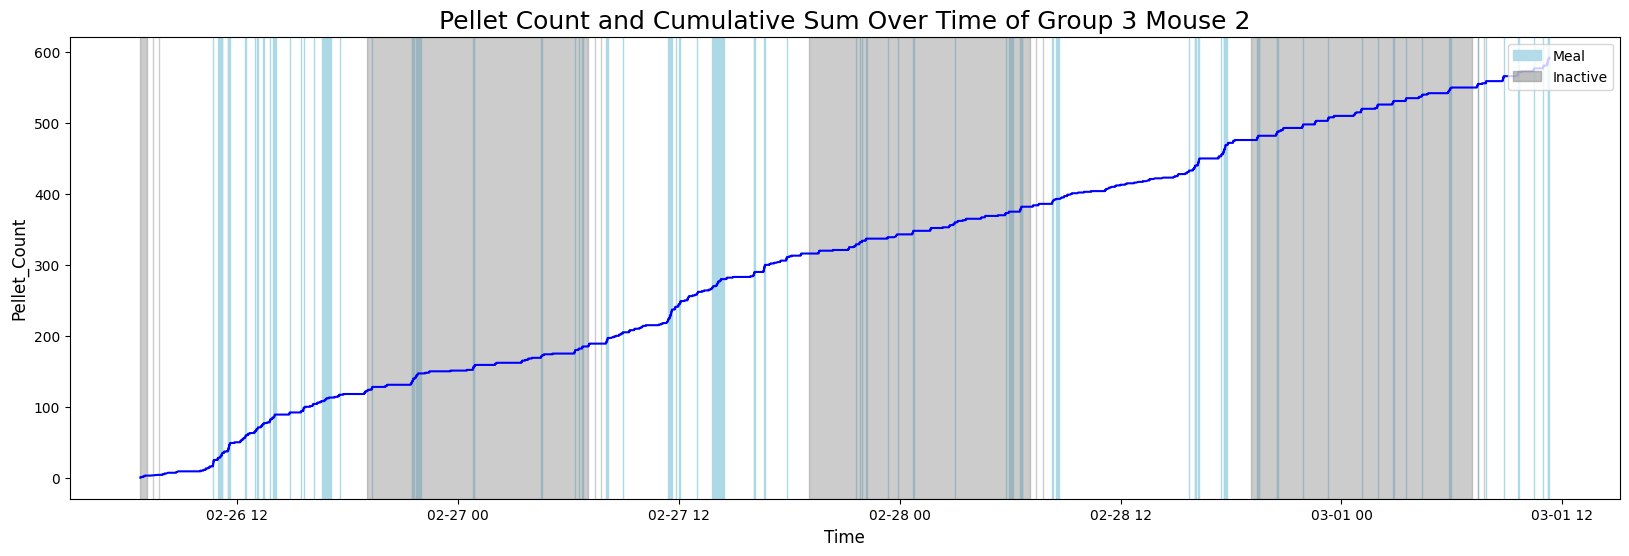

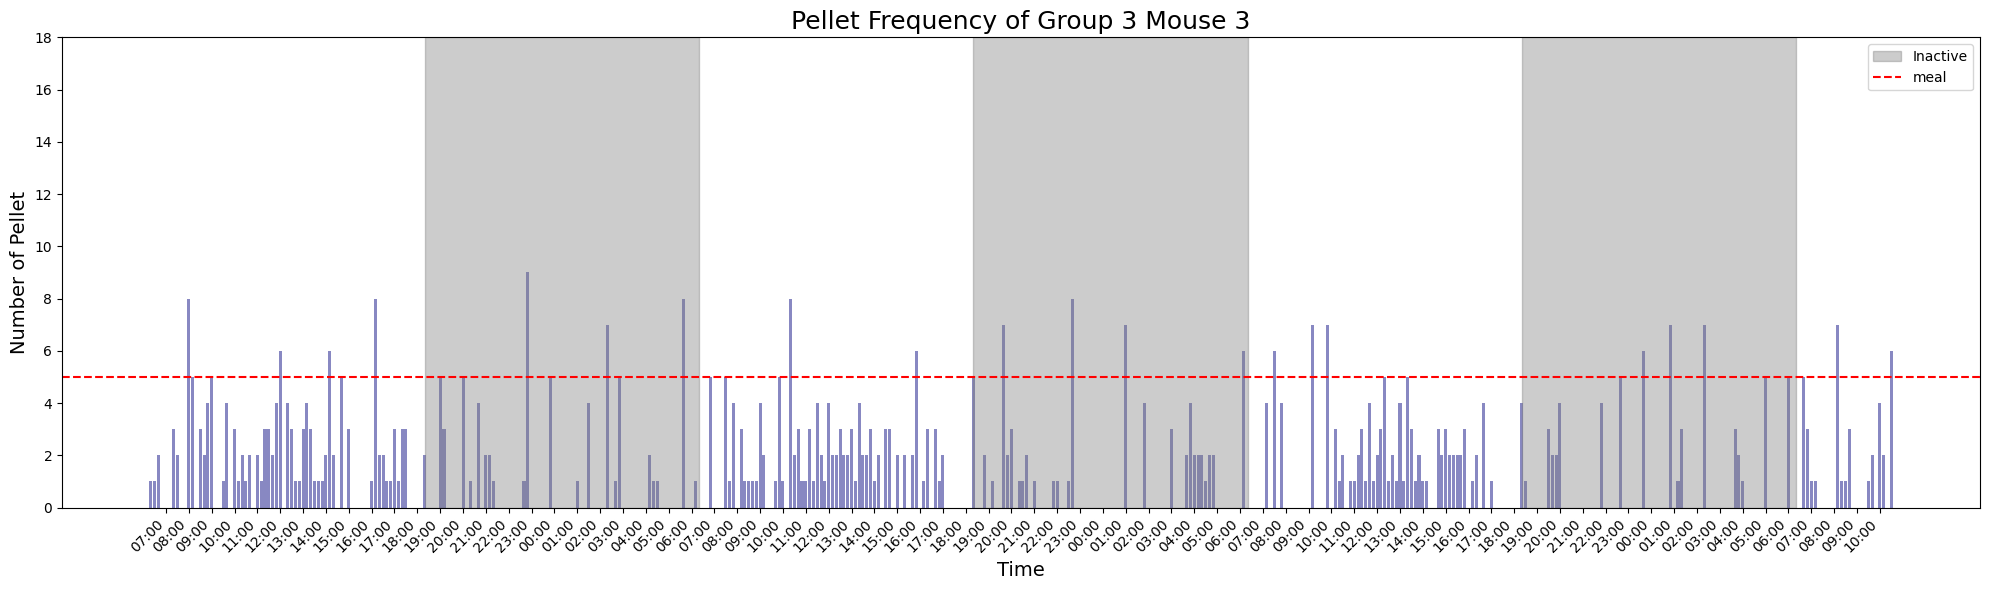

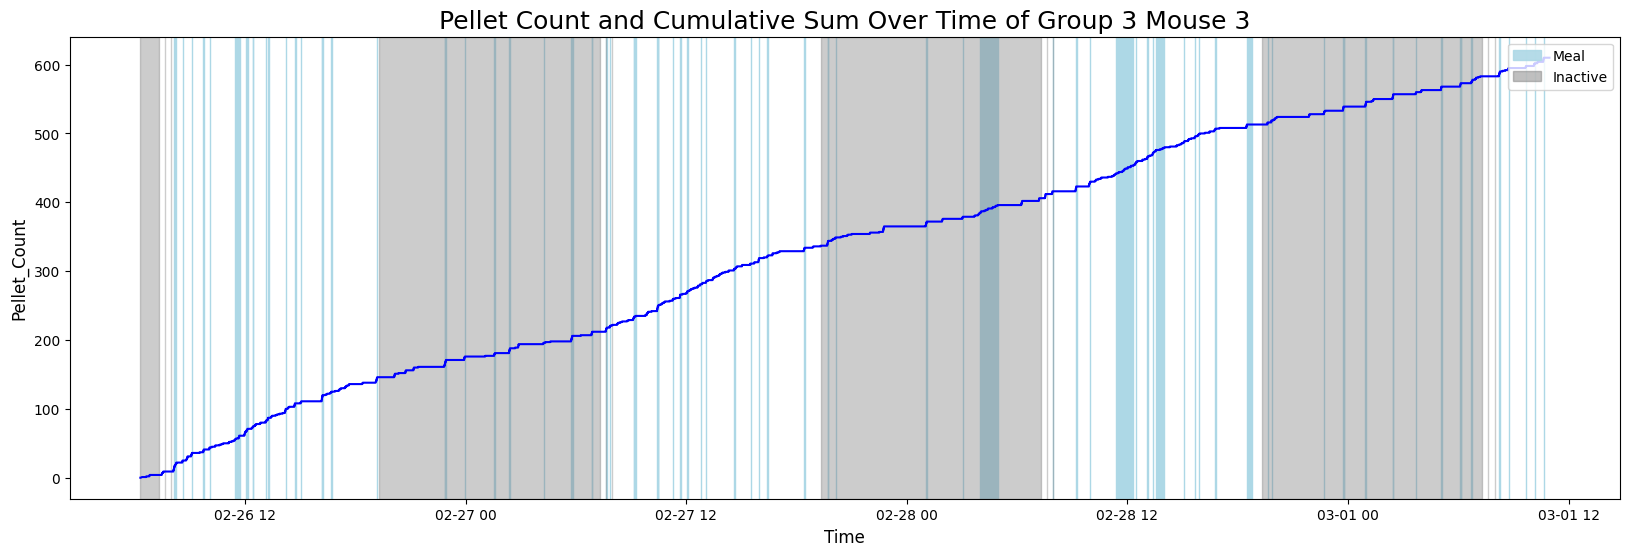

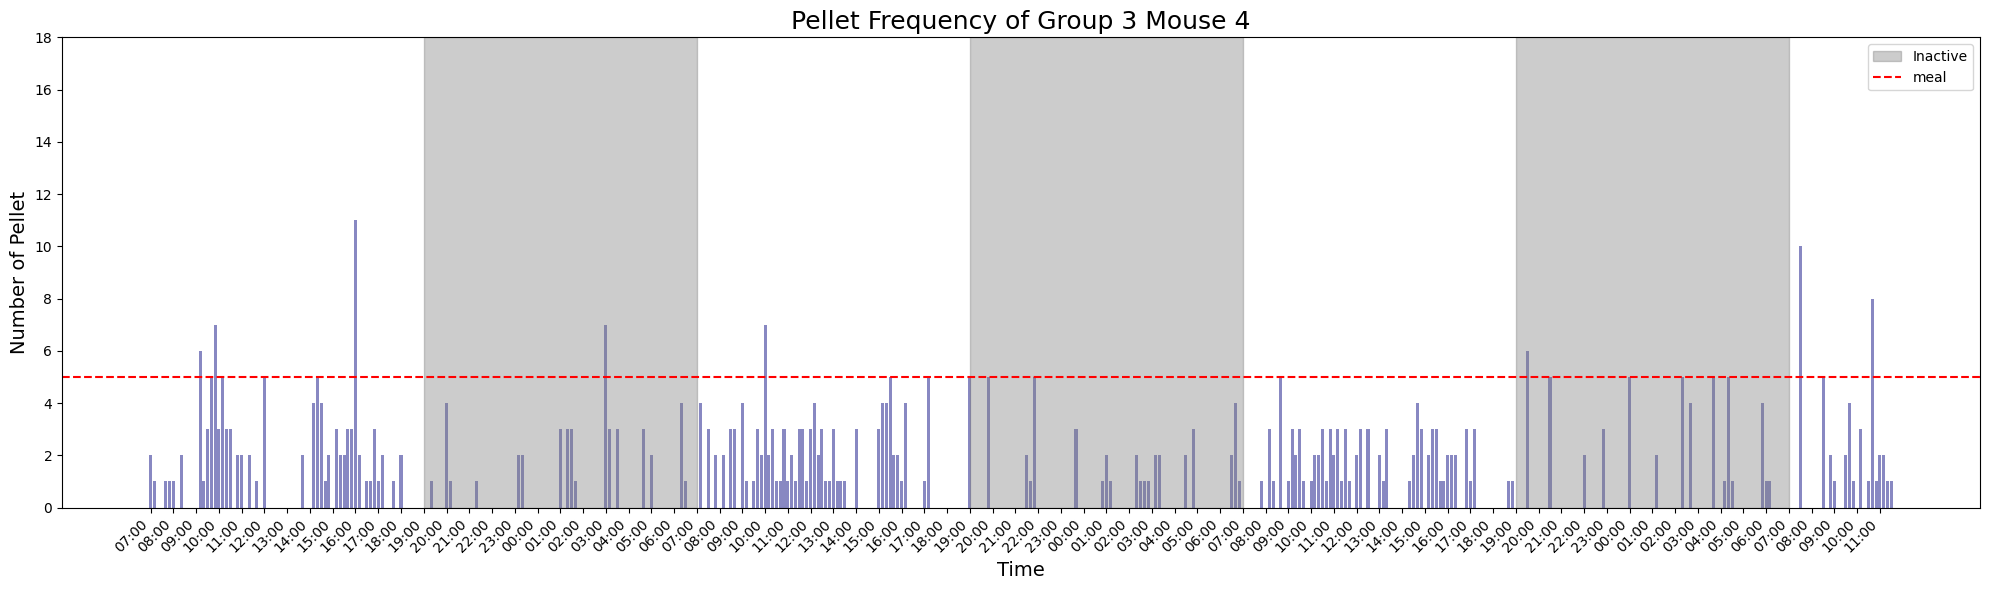

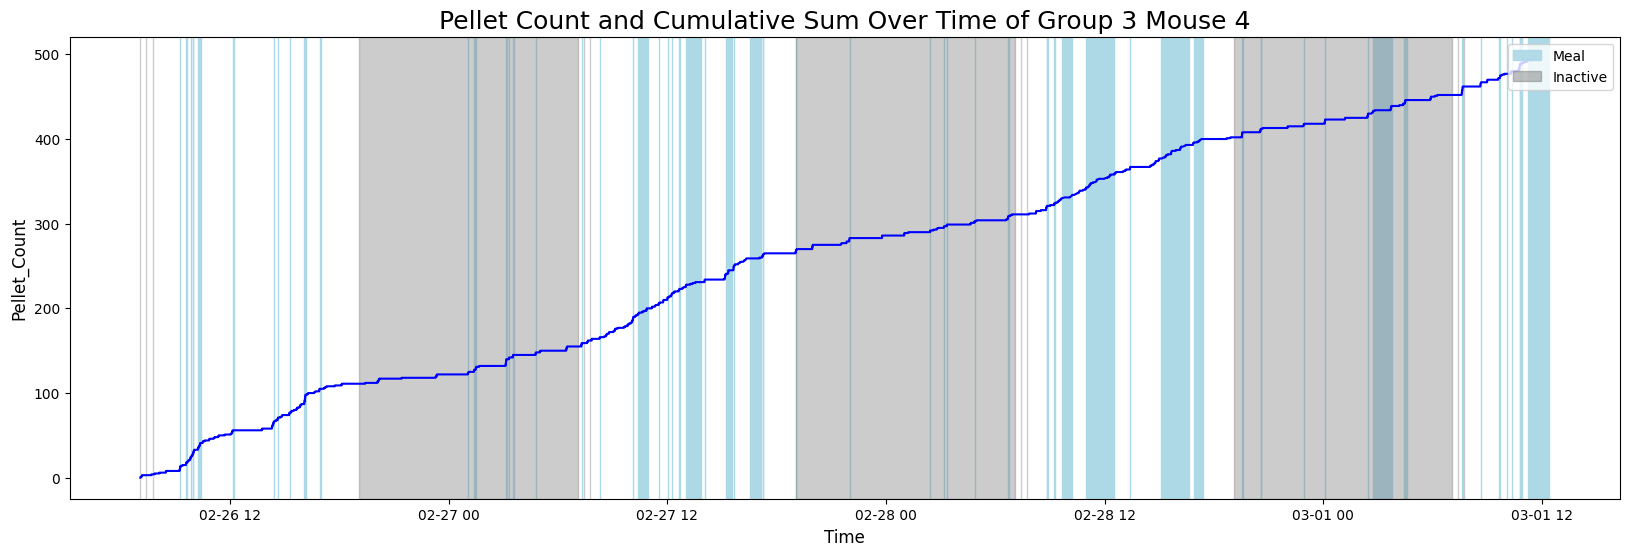

In [2]:
for sheet in rev_female_sheets:
    metrics = process_meal_data(sheet, rev_female_path, is_cask=False, 
                                prefix='female', 
                                export_root=os.path.join(export_root, 'WT_meal'))
    
    female_avg_pellet.append(metrics['avg_pellet'])
    female_dark_meals.append(metrics['dark_meals'])
    female_fir_meal.append(metrics['fir_meal'])
    female_fir_good_meal.append(metrics['fir_good_meal'])
    flip_female_meal_count.append(metrics['meal_count'])
    female_in_meal_ratios.append(metrics['in_meal_ratio'])

### Average Pellet

Female Size: 20
Female Average: 195.416
Female SE: 9.038


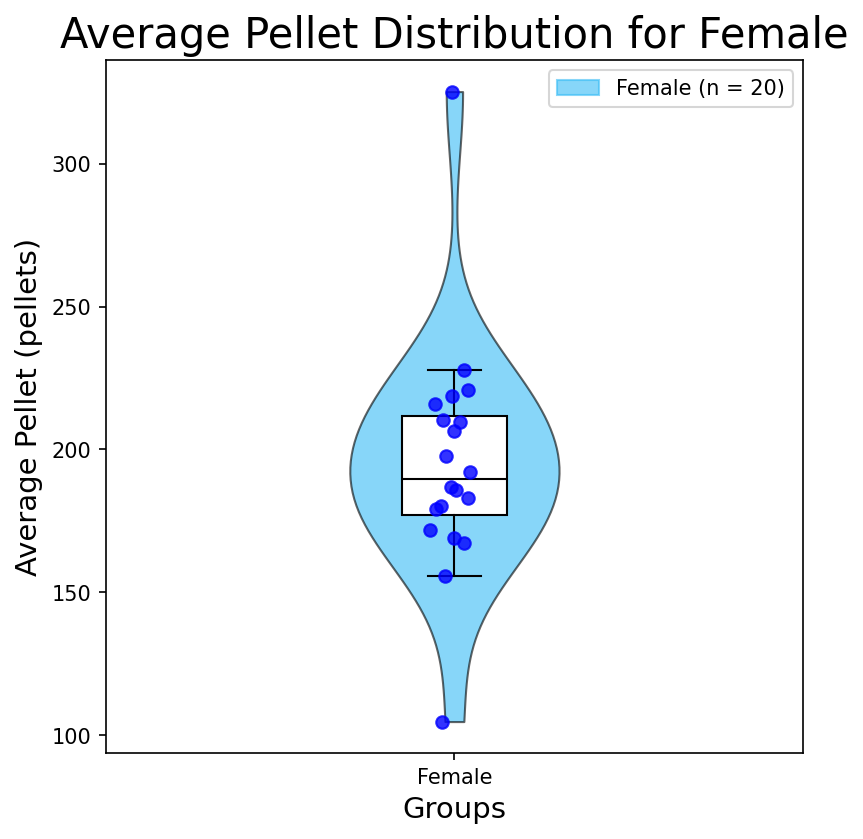

In [3]:
graph_single_stats(female_avg_pellet, stats_name='Average Pellet', unit='pellets', violin_width=0.3,
                  group_name='Female', 
                  export_path=os.path.join(export_root, '../Figure 4/WT_pellet_by_day.svg'))

In [4]:
np.mean(female_in_meal_ratios), np.std(female_in_meal_ratios) / np.sqrt(len(female_in_meal_ratios))

(0.5111437803466766, 0.011877154478208042)